## MNIST dataset

In [ ]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
%cd /content
%ls sample_data

/content
anscombe.json*               california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv                README.md*


In [ ]:
def load_MNIST( train_size = 1000 , test_size = 1000):

  print('Load..')
  mnist_train = pd.read_csv("./sample_data/mnist_train_small.csv")
  mnist_test  = pd.read_csv("./sample_data/mnist_test.csv")
  mnist_train.shape , mnist_test.shape

  print('Data preprocessing...')
  X_train = mnist_train.values[:,1:]
  y_train = mnist_train.values[:,0]
  print('train shape: ',X_train.shape , y_train.shape)
  y_train = y_train % 2
  y_train = y_train*2 - 1

  X_test = mnist_test.values[:,1:]
  y_test = mnist_test.values[:,0]
  print('test shape: ',X_test.shape , y_test.shape)
  y_test = y_test % 2
  y_test = y_test*2 - 1

  print('Data truncating...')
  X_train = X_train[:train_size]
  y_train = y_train[:train_size]
  X_test = X_test[:test_size]
  y_test = y_test[:test_size]

  print('train shape: ',X_train.shape , y_train.shape)
  print('test shape: ',X_test.shape , y_test.shape)
  return X_train ,y_train, X_test ,y_test


In [ ]:
X_train ,y_train, X_test ,y_test = load_MNIST()

Load..
Data preprocessing...
train shape:  (19999, 784) (19999,)
test shape:  (9999, 784) (9999,)
Data truncating...
train shape:  (1000, 784) (1000,)
test shape:  (1000, 784) (1000,)


In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar

L = np.sum(np.diag(X_train.T@X_train)) / 4 / X_train.shape[0]
lambda_ = 0.001* L

x_0 = np.zeros(X_train.shape[1])

L , lambda_

NameError: name 'X_train' is not defined

In [ ]:
data_MNIST = (X_train ,y_train, X_test ,y_test,L ,lambda_, x_0)

In [ ]:
# print(len(np.where(y_train == -1)[0]) , len(np.where(y_train == 1)[0]),len(np.where(y_train == -1)[0]) / len(y_train))

# print(len(np.where(y_test == -1)[0]) , len(np.where(y_test == 1)[0]) , len(np.where(y_test == -1)[0])/ len(y_test))

In [ ]:
# X_train.shape , y_train.shape , X_test.shape , y_test.shape

In [ ]:
# print(y_train[5])
# plt.imshow(X_train[5].reshape((28,28)))

## Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%ls
%mkdir /content/drive/MyDrive/Experiments_CFW
experiments_dir = '/content/drive/MyDrive/Experiments_CFW/'

drive/  sample_data/
mkdir: cannot create directory ‘/content/drive/MyDrive/Experiments_CFW’: File exists


## SVM light

In [ ]:
!git clone https://github.com/ThunderstormXX/Methods-Optimization/
%cd /content/Methods-Optimization/8sem/hw_2_

/content/Methods-Optimization/8sem/hw_2_


In [ ]:
dataset = "mushrooms.txt"
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
y = 2 * y - 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape , X_test.shape

((6499, 112), (1625, 112))

In [ ]:
L = np.sum(np.diag(X_train.T@X_train)) / 4 / X_train.shape[0]
lambda_ = 0.001* L

x_0 = np.zeros(X_train.shape[1])

L , lambda_

(5.25, 0.00525)

In [ ]:
data_LIBSVM = (X_train ,y_train, X_test ,y_test,L ,lambda_, x_0)

In [ ]:
# import urllib.request
# from sklearn.datasets import load_svmlight_file
# from sklearn.model_selection import train_test_split

# url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/w1a"
# local_file_path = "w1a"

# urllib.request.urlretrieve(url, local_file_path)
# X, y = load_svmlight_file(local_file_path)
# X_dense = X.toarray()
# X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)
# print(X_train.shape , X_test.shape)


In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar

In [ ]:
def func(w,X = X_train,y = y_train) :
    return np.mean(np.log(1+ np.exp(-y*(X@w))))
def grad(w, X = X_train, y = y_train):
    exp_ = np.exp(-y*(X@w))
    return np.mean( (-(X.T*y).T).T*(exp_/ (1+exp_)) , axis=1)

def gessian(w,X=X_train,y=y_train) :
    exp_ = np.exp(-y*(X@w))
    d = exp_ / (1+exp_)**2
    return 1/X.shape[0]* X.T@np.diag(d)@X

w = np.ones(X_train.shape[1])/X_train.shape[1]
print(func(w + 0.01*w) - func(w) , 0.01*grad(w)@w )
print(np.linalg.norm(grad(w + 0.0001*w) - grad(w) -  0.0001* gessian(w)@w)/np.linalg.norm(grad(w + 0.0001*w) - grad(w)) )

5.474718850173588e-05 5.4311600750513465e-05
8.769537628959556e-07


## Добавим регуляризацию $\frac{\lambda}{2} \| w \|_2^2 $ , где $\lambda = 0.001 L$

In [ ]:
f = lambda w: func(w ,X_train,y_train )
nabla_f = lambda w: grad(w, X_train,y_train)
gessian_f = lambda w: gessian(w, X_train,y_train)


func_reg = lambda w,X,y,lambda_ : func(w ,X,y ) + lambda_/2 * np.linalg.norm(w)**2
grad_reg = lambda w,X,y,lambda_ : grad(w ,X,y ) + lambda_* w
gessian_reg = lambda w,X,y,lambda_: gessian(w, X,y) + lambda_ * np.eye(w.shape[0])

f_reg = lambda w: func_reg(w ,X_train,y_train, lambda_ )
nabla_f_reg = lambda w: grad_reg(w, X_train,y_train, lambda_)
gessian_f_reg = lambda w: gessian_reg(w, X_train,y_train, lambda_)

print(np.linalg.norm(nabla_f_reg(w + 0.0001*w) - nabla_f_reg(w) -  0.0001* gessian_f_reg(w)@w)/np.linalg.norm(nabla_f_reg(w + 0.0001*w) - nabla_f_reg(w)) )


8.751451955421372e-07


## Src code

In [ ]:
#ваше решение (Code и Markdown)
import matplotlib.pyplot as plt
from tqdm import tqdm
import time as ti

def plot(history_arr, curve_name_arr, title = 'Convergence graphic'  , times = None, ylabel= None, save = None):
    plt.figure(figsize=(10,8))
    if times is not None:
        for i,history in enumerate(history_arr) :
            plt.loglog(times[i],history , label=curve_name_arr[i])
    else :
        for i,history in enumerate(history_arr) :
            plt.loglog(np.arange(len(history)),history , label=curve_name_arr[i])
    if times is None :
        plt.xlabel('iterations')
    else :
        plt.xlabel('time (sec)')
    if ylabel is None :
        plt.ylabel('Criterion')
    else :
        plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)

    if save is not None :
        plt.savefig(save)

    plt.show()

def trainer(f, nabla_f, x_0,  optimizer , x_sol=None,
                     K = 10**3, eps = 10**-5, mode = 'gap' , time=False , all_points = False, R = 1):
    error = None
    x_last = x_0  # x_k-1
    x_curr = x_0  # x_k
    x_new = x_0   # x_k+1

    if time :
        times = []

    if mode == 'x_k - x^*' :
        error = lambda x : np.sum((x - x_sol)**2)
        # print('Error mode: || x - x^*||')
    elif mode == 'f(x_k) - f(x^*)':
        f_sol = f(x_sol)
        error = lambda x : f(x) - f_sol
        # print('Error mode: f(x) - f(x^*)')
    elif mode == 'x_k+1 - x_k':
        error = lambda x: np.sum((x - x_last)**2)
        # print('Error mode: || x_k+1 - x_k||')
    elif mode == 'f(x_k+1) - f(x_k)':
        error = lambda x : f(x) - f(x_last)
        # print('Error mode: f(x_k+1) - f(x_k)')
    elif mode == '||nabla_f(x)|| / ||nabla_f(x_0)||':
        norm_nabla_0 = np.linalg.norm(nabla_f(x_0),ord=2)
        error = lambda x : np.linalg.norm(nabla_f(x), ord=2)  / norm_nabla_0
    elif mode == 'gap' :
        error = lambda x : nabla_f(x)@(x - linear_opt(nabla_f(x),R))
    assert error is not None

    if all_points :
        points = []

    error_history = []

    logger = []

    for j in tqdm(range(K)):

        x_new = optimizer.step(x_curr , x_last)

        x_last = x_curr
        x_curr = x_new
        # print(error(x_curr))
        error_history.append(error(x_curr))
        if all_points :
            points.append(x_curr)
        if time :
            times.append(ti.time())
        if eps is not None :
            if error_history[-1] < eps :
                return x_curr , error_history

    if all_points :
        x_curr = points
    if time :
        return x_curr , error_history , times
    else :
        return x_curr , error_history

In [ ]:
def experiments( methods , args  , logs = None ) :
    if logs is None :
        logs = []

    for method , arg in zip(methods , args) :
        optimizer = method(**arg)
        x_result, err_arr, time_arr = trainer(f = arg['f'], nabla_f =arg['nabla_f'], x_0=arg['x_0'], optimizer = optimizer ,K = arg['max_iter'], eps=None , R = arg['R'], mode = arg['mode'] , time=True, all_points = True)

        time_arr = np.array(time_arr) - time_arr[0]
        accumulated = np.minimum.accumulate(err_arr)
        log = {
            'name': optimizer.name() ,
            'x': x_result ,
            'crit': err_arr ,
            'times': time_arr ,
            'accumulated': accumulated  ,
            'optimizer_log' : optimizer.get_log()
            }
        logs.append(log)
    return logs

def plot_log(logs , index , times = None , accumulated = None , criterion = None ,title = 'Convergence graphic', ylabel = None, save = None ) :
    logs_curr = [logs[i] for i in index]
    if times is not None :
        times = list(map( lambda log: log['times'] , logs_curr ))
    if accumulated is not None:
        accumulated = list(map( lambda log: log['accumulated'] , logs_curr ))
    names = list(map( lambda log: log['name'] , logs_curr ))
    crits = list(map( lambda log: log['crit'] , logs_curr ))

    if criterion is None :
        values = accumulated if accumulated is not None else crits
    else :
        values = [criterion(x) for x in list(map(lambda y: y['x'] , logs_curr ))]
    plot(values, names, title = title  , times = times , ylabel = ylabel, save = save)

In [ ]:
def plot_log_K(logs , index_arr , times_arr = None , accumulated_arr = None , criterion_arr = None ,title_arr = None, main_title = 'Convergence graphics' , ylabel_arr = None, save = None):

    keys = list(set([logs[i]['name'] for index in index_arr for i in index]))
    dict_keys = dict()
    for i, key in enumerate(keys) :
        dict_keys[key] = i
    color_generator = plt.cm.get_cmap('tab20', len(keys))
    colors = [color_generator(i) for i in np.linspace(0, 1,len(keys))]

    fig, axs = plt.subplots(1, len(index_arr), figsize=(20, 10))
    fig.suptitle(main_title, fontsize=28)

    for e , index in enumerate(index_arr) :
      logs_curr = [logs[i] for i in index]

      names = list(map( lambda log: log['name'] , logs_curr ))
      crits = list(map( lambda log: log['crit'] , logs_curr ))

      times = None
      if times_arr is not None :
          if times_arr[e] is not None :
              times = list(map( lambda log: log['times'] , logs_curr ))


      accumulated = None
      if accumulated_arr is not None:
          if accumulated_arr[e] is not None :
              accumulated = list(map( lambda log: log['accumulated'] , logs_curr ))

      if criterion_arr is None :
          values = accumulated if accumulated is not None else crits
      else :
          if criterion_arr[e] is not None:
              criterion = criterion_arr[e]
              values = [criterion(x) for x in list(map(lambda y: y['x'] , logs_curr ))]

      for idx , log in enumerate(logs_curr) :
          y = values[idx]
          x = np.arange(len(y)) if times is None else times[idx]
          labl = names[idx]
          axs[e].loglog(x, y , color = colors[dict_keys[labl]] ,label = labl)
      axs[e].set_xscale('log')
      axs[e].set_ylabel('Criterion', fontsize = 28)
      if times is not None :
          axs[e].set_xlabel('Time (sec)' , fontsize = 28)
      else :
          axs[e].set_xlabel('iterations' , fontsize = 28)
      axs[e].set_title(title_arr[e], fontsize=28)
      axs[e].legend(loc=1, prop={'size': 13})

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    if save is not None :
        plt.savefig( save, format = 'pdf' )
    plt.show()

## Метрики и критерии

In [ ]:
def accuracy(w_arr, diff_one = False):
    w_arr = np.array(w_arr).T
    y_pred = (np.exp( X_test@w_arr) > 0.5)*2 - 1
    if diff_one :
        return [ 1 - sum(y == y_test)/len(y_test) for y in y_pred.T ]
    else :
        return [ sum(y == y_test)/len(y_test) for y in y_pred.T ]

def grad_norm(w_arr , grad , relative = True):
    res = []
    grad_0 = np.linalg.norm(grad(w_arr[0]))
    for w in w_arr:
        if relative :
            res.append(np.linalg.norm(grad(w))/ grad_0)
        else :
            res.append(np.linalg.norm(grad(w)))
    return res
grad_norm_crit = lambda y: grad_norm(y , grad = nabla_f)
grad_norm_reg_crit = lambda y: grad_norm(y , grad = nabla_f_reg)

acc = lambda y : accuracy(y , diff_one = False)
acc1 = lambda y : accuracy(y , diff_one = True)

## Линейный оракул

In [ ]:
#ваше решение (Code и Markdown)
def linear_opt(g , R = 1) :
    s = np.zeros(len(g))
    top_idx = np.argmax(np.abs(g))
    s[top_idx] = - R * np.sign(g[top_idx])
    return s

g = np.array([1,2,3,-5,1,2,5,6,7,2])
linear_opt(g)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.])

## Алгоритмы

# FW

In [ ]:
def step_size( f , d ,x ,g ,L , gamma_max , tau = 1.1 ,eta = 0.9 , max_iter = 10):
    M = eta*L # choose M from [ eta*L , L ]
    d_norm = np.linalg.norm(d)**2
    gamma = min( g / (M *  d_norm), gamma_max )
    while f(x + gamma* d) > f(x) - gamma* g + gamma**2*M/2 * d_norm:
        M = tau*M
        gamma = min( g / (M *  d_norm), gamma_max )
    return gamma , M

print(1- np.log(0.9)/np.log(1.1))

2.1054487136015796


In [ ]:
class FrankWolfe:
    def __init__(self,f , nabla_f , linesearch = False, R =None , backtracking = False , L = 100 , **args) :
        self.log = []
        self.iter = 0
        self.R = R
        self.linesearch = linesearch
        self.backtracking = backtracking
        self.L = L

        self.func = f
        self.nabla = nabla_f
    def name(self):
        class_name = str(self.__class__).split('__main__.')[1][:-2]
        if self.backtracking :
            return class_name + ' backtracking linesearch '
        else :
            return class_name + ' linesearch' if self.linesearch else class_name + ' Vanilla'
    def get_log(self) :
        return self.log
    def step(self , x , x_last) :
        self.iter += 1
        if self.linesearch is False :
            d_k = linear_opt(self.nabla(x),self.R) - x
            self.log.append({
                  'k': self.iter ,
                  'x_last': x_last ,
                  'x' : x ,
                  'd_k' : d_k
            })
            return x +  2/(self.iter + 2)*(d_k)
        else :
            d_k = linear_opt(self.nabla(x),self.R) - x

            if self.backtracking:
                g = - self.nabla(x) @ d_k
                h , L = step_size( self.func , d_k ,x ,g , self.L , gamma_max = 1 , tau = 1.1 ,eta = 0.9 )
                self.L = L
            else :
                h = minimize_scalar( lambda h : self.func(x + h * d_k) , bounds = (0.0,1.0) ,options= {'xatol': 1e-12 } ).x

            self.log.append({
                  'k': self.iter ,
                  'x_last': x_last ,
                  'x' : x ,
                  'd_k' : d_k ,
                  'gamma': h ,
            })
            return x + h*d_k
# TEST
FrankWolfe(f=f,nabla_f = nabla_f).name()

'FrankWolfe Vanilla'

# CFW

In [ ]:
class ConjugateFrankWolfe:
    def __init__(self,f , nabla_f , R =None , max_alpha = 0.95, hess = None,backtracking=False,  L = 100 , **args) :
        self.log = []
        self.iter = 0
        self.R = R
        self.func = f
        self.nabla = nabla_f
        self.max_alpha = max_alpha
        self.hessian = hess
        self.last_nabla = None
        self.last_s_k = None
        self.backtracking = backtracking
        self.L = L
    def name(self):
        class_name = str(self.__class__).split('__main__.')[1][:-2]
        class_name = class_name + ' backtracking linesearch' if self.backtracking else class_name
        return class_name + ' (real hessian)' if self.hessian is not None else class_name + ' (approx hessian)'
    def get_log(self) :
        return self.log
    def step(self , x , x_last) :
      if self.hessian is None :
          if self.iter == 0 :
              self.iter += 1
              self.last_nabla = self.nabla(x)
              self.last_s_k = linear_opt(self.last_nabla ,self.R)
              d_k = self.last_s_k - x
              h = minimize_scalar( lambda h : self.func(x + h * d_k) , bounds = (0.0,1.0) ,options= {'xatol': 1e-12 } ).x


              return x + h*d_k
          else :
              self.iter += 1
              new_nabla = self.nabla(x)
              last_nabla = self.last_nabla
              s_k_FW = linear_opt(new_nabla,self.R)
              delta_nabla = new_nabla - last_nabla

              last_s_k = self.last_s_k
              denom = delta_nabla@(s_k_FW -  last_s_k )
              if denom == 0 :
                  alpha = 1
              else :
                  alpha = delta_nabla@(s_k_FW - x) / denom
              if alpha < 0 :
                  alpha = 0
              if alpha > self.max_alpha :
                  alpha = self.max_alpha
              # print(alpha)
              new_s = (1 - alpha) * s_k_FW + alpha * self.last_s_k

              self.last_nabla = new_nabla
              self.last_s_k = new_s

              d_k = new_s - x
              h = minimize_scalar( lambda h : self.func(x + h * d_k) , bounds = (0.0,1.0) ,options= {'xatol': 1e-12 } ).x
              self.log.append({
                  'new_nabla': new_nabla  ,
                  'last_nabla': last_nabla,
                  # 'k': self.iter ,
                  # 'H_k': H_k ,
                  's_k_FW': s_k_FW ,
                  'last_s_k': last_s_k ,
                  # 'x_last': x_last ,
                  'x' : x ,
                  'd_k' : d_k ,
                  # 'gamma': h ,
                  'denom': denom ,
                  'alpha': alpha
              })

              return x + h*d_k
      else :
          if self.iter == 0 :
              self.iter += 1
              self.last_s_k = linear_opt(self.nabla(x) ,self.R)
              d_k = self.last_s_k - x
              h = minimize_scalar( lambda h : self.func(x + h * d_k) , bounds = (0.0,1.0) ,options= {'xatol': 1e-12 } ).x
              return x + h*d_k
          else :
              self.iter += 1
              new_nabla = self.nabla(x)
              s_k_FW = linear_opt(new_nabla,self.R)
              H_k = self.hessian(x)
              last_s_k = self.last_s_k

              denom = (s_k_FW - self.last_s_k )@(H_k@( self.last_s_k -  x_last ))
              if denom == 0 :
                  alpha = 1
              else :
                  alpha = (s_k_FW - x)@(H_k@(self.last_s_k - x_last)) / denom
              if alpha < 0 :
                  alpha = 0
              if alpha > self.max_alpha :
                  alpha = self.max_alpha
              # print(alpha)
              new_s = (1 - alpha) * s_k_FW + alpha * self.last_s_k

              self.last_s_k = new_s

              d_k = new_s - x
              if self.backtracking:
                  g = - self.nabla(x) @ d_k
                  h , L = step_size( self.func , d_k ,x ,g , self.L , gamma_max = 1 , tau = 1.1 ,eta = 0.9 )
                  self.L = L
              else :
                  h = minimize_scalar( lambda h : self.func(x + h * d_k) , bounds = (0.0,1.0) ,options= {'xatol': 1e-12 } ).x

              self.log.append({
                  # 'k': self.iter ,
                  'H_k': H_k ,
                  's_k_FW': s_k_FW ,
                  'last_s_k': last_s_k ,
                  'x_last': x_last ,
                  'x' : x ,
                  'd_k' : d_k ,
                  # 'gamma': h ,
                  'denom': denom ,
                  'alpha': alpha
              })

              return x + h*d_k

# TEST
ConjugateFrankWolfe(f=f,nabla_f = nabla_f).name()

'ConjugateFrankWolfe (approx hessian)'

## Boosted Frank Wolfe

In [ ]:
# class BoostedFrankWolfe:
#     def __init__(self,f , nabla_f , R =None , min_alpha = 0.05, N = 2, **args) :
#         self.log = []
#         self.iter = 0
#         self.R = R
#         self.func = f
#         self.nabla = nabla_f
#         self.min_alpha = min_alpha
#         self.N = N
#         self.last_nabla = None
#         self.last_s_k = None
#         self.S_list = []

#     def name(self):
#         class_name = str(self.__class__).split('__main__.')[1][:-2]
#         # class_name = class_name + ' backtracking linesearch' if self.backtracking else class_name
#         return class_name + ' N = ' + str(self.N)
#         # return class_name + ' (real hessian)' if self.hessian is not None else class_name + ' (approx hessian)'
#     def get_log(self) :
#         return self.log
#     def step(self , x , x_last) :

#         if self.iter == 0 :
#             self.iter += 1
#             self.last_s_k = linear_opt(self.nabla(x) ,self.R)
#             d_k = self.last_s_k - x
#             h = minimize_scalar( lambda h : self.func(x + h * d_k) , bounds = (0.0,1.0) ,options= {'xatol': 1e-12 } ).x

#             self.S_list.append(self.last_s_k)
#             return x + h*d_k
#         else :
#             self.iter += 1
#             new_nabla = self.nabla(x)
#             s_k_FW = linear_opt(new_nabla,self.R)
#             last_s_k = self.last_s_k


#             S_arr = np.array(self.S_list) # (N , dim )
#             # print(S_arr.shape)

#             S_coefs = new_nabla @ (S_arr - x ).T
#             # print(S_coefs.shape)

#             negative = np.where(S_coefs < 0 )

#             FW_coef = new_nabla @ (s_k_FW - x )


#             # if FW_coef/(sum(S_coefs[negative]) + FW_coef) < self.min_alpha :
#             #     FW_coef = sum(S_coefs[negative])  * self.min_alpha /(1-self.min_alpha)

#             denom = sum(S_coefs[negative]) + FW_coef


#             # print(FW_coef/denom , S_coefs/denom)

#             new_s = ( FW_coef * s_k_FW + S_coefs[negative] @ S_arr[negative] )/ denom

#             self.last_s_k = new_s

#             self.S_list.append(new_s)
#             if len(self.S_list) > self.N :
#                 self.S_list.pop(0)

#             d_k = new_s - x
#             h = minimize_scalar( lambda h : self.func(x + h * d_k) , bounds = (0.0,1.0) ,options= {'xatol': 1e-12 } ).x


#             self.log.append({
#                 'k': self.iter ,
#                 's_k_FW': s_k_FW ,
#                 'last_s_k': last_s_k ,
#                 'x_last': x_last ,
#                 'x' : x ,
#                 'd_k' : d_k ,
#                 'gamma': h ,
#                 'cnt_negatives': len(negative[0])
#             })

#             return x + h*d_k

# # TEST
# BoostedFrankWolfe(f=f,nabla_f = nabla_f).name()

# NFW

In [ ]:
class NConjugateFrankWolfe:
    def __init__(self,f , nabla_f , R =None , max_alpha = 0.95, hess = None , n_conjugates = 3, backtracking = False, L = 100, **args) :
        self.iter = 0
        self.log = []
        self.R = R
        self.func = f
        self.nabla = nabla_f
        self.max_alpha = max_alpha
        self.n_conjugates = n_conjugates

        self.backtracking = backtracking
        self.L = L

        self.hessian = hess

        self.d_delta_nabla_list = []
        self.d_list = []
        self.S_list = []
        self.gamma_list = []
        self.epoch = 0

        self.last_nabla = None
        self.last_s_k = None
        self.gamma = 1
    def get_log(self) :
        return self.log
    def name(self):
        class_name = str(self.__class__).split('__main__.')[1][:-2]
        class_name = class_name + ' backtracking linesearch' if self.backtracking else class_name
        temp_name = class_name + ' (real hessian)' if self.hessian is not None else class_name + ' (approx hessian)'
        return temp_name + ' N = ' + str(self.n_conjugates)
    def step(self , x , x_last) :
        self.iter = self.iter + 1
        if self.gamma > 0.99999 :
            self.epoch = 0
            self.S_list = []
            self.d_list = []
            self.d_delta_nabla_list = []
        if self.iter == 1  or self.epoch == 0:
            self.epoch  = self.epoch + 1
            new_nabla = self.nabla(x)
            sk_FW = linear_opt(new_nabla ,self.R)
            dk = sk_FW - x

            nabla_sk_FW = self.nabla(sk_FW)

            self.S_list.append(sk_FW)
            self.d_list.append(dk)

            if self.hessian is None :
                self.d_delta_nabla_list.append( nabla_sk_FW - new_nabla)

        else :
            new_nabla = self.nabla(x)
            sk_FW = linear_opt( new_nabla ,self.R)
            dk_FW = sk_FW - x
            if self.hessian is not None:
                hessian = self.hessian(x)
                B = np.sum(np.array(self.d_list)@hessian@np.array(self.d_list).T    , axis=1)
                A = np.sum(np.array(self.d_list)@hessian@np.array(dk_FW).reshape((x.shape[0],1))     , axis=1)
            else :
                # print(np.array(self.d_delta_nabla_list).shape , np.array(self.d_list).T.shape )
                # print(np.array(self.d_delta_nabla_list).shape , np.array(dk_FW).shape )
                B = np.sum( np.array(self.d_delta_nabla_list) @ np.array(self.d_list).T,axis=1)
                A = np.sum( np.array(self.d_delta_nabla_list) @ np.array(dk_FW).reshape((x.shape[0],1))  ,axis=1)



            # print(np.array(self.d_list).shape ,hessian.shape ,np.array(self.d_list).shape)
            # print(B.shape , A.shape)
            N = len(B)
            # print(N)
            # print('N = ',N , 'B shape ', B.shape)
            betta = [-1]*(N+1)
            betta_sum = 0
            delta = 0.0001
            # print(A.shape , B.shape  , len(self.gamma_list ) , len(betta))
            for m in range(N,0,-1) :
                betta[m] = -A[-m]/(B[-m]*(1- self.gamma_list[-m])) + betta_sum*self.gamma_list[-m]/(1-self.gamma_list[-m])
                if betta[m] < 0 :
                    betta[m] = 0
                else :
                    betta_sum = betta_sum + betta[m]
            alpha_0 = 1/(1+betta_sum)
            alpha = np.array(betta)[1:] * alpha_0
            alpha = alpha[::-1]

            sk = alpha_0*sk_FW + np.sum(alpha*np.array(self.S_list).T , axis=1)
            dk = sk - x

            if self.hessian is None :
                nabla_sk = self.nabla(sk)
                self.d_delta_nabla_list.append( nabla_sk - new_nabla)

            self.d_list.append(dk)
            self.S_list.append(sk)
            self.epoch = self.epoch + 1
            if self.epoch > self.n_conjugates :
                self.d_list.pop(0)
                if self.hessian is None :
                    self.d_delta_nabla_list.pop(0)
                self.S_list.pop(0)
                self.gamma_list.pop(0)
                self.epoch = self.epoch - 1

        h = minimize_scalar( lambda h : self.func(x + h * dk) , bounds = (0.0,1.0) ,options= {'xatol': 1e-12 } ).x

        self.gamma = h
        self.gamma_list.append(h)

        # print('gamma = ', self.gamma , 'epoch = ', self.epoch , 'N =' , len(self.d_list ) )
        return x + h*dk

# TEST
NConjugateFrankWolfe(f=f,nabla_f = nabla_f).name()

'NConjugateFrankWolfe (approx hessian) N = 3'

In [ ]:
class LBFGS:
    def __init__(self, f , nabla_f , gessian , m , **args ) :
        self.log = []
        self.iter = 0
        self.func = f
        self.nabla = nabla_f
        self.gessian = gessian

        self.m = m
        self.s_list= []
        self.y_list = []
        self.rho_list = []
        self.H = None
        self.r = None
    def name(self):
        class_name = str(self.__class__).split('__main__.')[1][:-2]
        return class_name + ' m = ' + str(self.m)
    def get_log(self):
        return self.log
    def step(self , x , x_last) :
        if self.iter == 0 :
            self.H = 1
            self.r = 1
        self.iter += 1

        grad_k = self.nabla(x)

        if self.iter == 1 :
            p_k = -np.dot(self.H, grad_k)
        else :
            p_k = -self.r
        alpha = minimize_scalar( lambda alpha : self.func(x + alpha * p_k) , bounds = (0.0,1.0) , tol = 1e-12 ).x
        new_x = x + alpha * p_k
        new_grad = self.nabla(new_x)

        #STORAGE
        s = new_x - x
        y = new_grad - grad_k
        ro = 1.0/np.dot(y, s)
        self.s_list.append(s)
        self.y_list.append(y)
        self.rho_list.append(ro)
        if len(self.s_list) > self.m :
            self.s_list.pop(0)
            self.y_list.pop(0)
            self.rho_list.pop(0)

        q = grad_k.copy()
        alphas = []

        for si, yi, ri in zip(self.s_list[::-1], self.y_list[::-1], self.rho_list[::-1]):
            alpha_i = ri * np.dot(si, q)
            alphas.append(alpha_i)
            q -= alpha_i * yi

        r = self.H*q

        for si, yi, ri, alpha_i in zip(self.s_list, self.y_list, self.rho_list, alphas[::-1]):
            beta = ri * np.dot(yi, r)
            r += si * (alpha_i - beta)

        self.r = r
        self.H = np.dot(self.s_list[-1], self.y_list[-1]) / np.dot(self.y_list[-1], self.y_list[-1])

        return new_x

## TEST
LBFGS(f=f , nabla_f = nabla_f , gessian = gessian , m = 10).name()

'LBFGS m = 10'

In [ ]:
class Nesterov:
    def __init__(self,f , nabla_f , gamma, term = None ,tau=None , **args) :
        self.iter = 0
        self.log = []
        self.tau = tau
        self.gamma = gamma
        self.term = term
        self.func = f
        self.nabla = nabla_f
    def get_log(self):
        return self.log
    def name(self, n_digits = 3):
        class_name = str(self.__class__).split('__main__.')[1][:-2]
        addition = ' term = '+ str(self.term) if self.tau is None else ' tau = ' + str(self.tau)
        gamma = ' gamma = ' + str(round(self.gamma , n_digits ))
        return class_name + ' ('+addition + gamma + ' )'
    def step(self , x , x_last) :
        self.iter += 1
        if self.tau is None :
            next_x =  x + (self.iter/(self.iter + self.term))*(x - x_last)
            return next_x - self.gamma*self.nabla(next_x)
        else :
            next_x = x  + self.tau*(x - x_last)
            return next_x - self.gamma*self.nabla(next_x)
## TEST
Nesterov(f=f,nabla_f = nabla_f , gamma = 0.03251 , tau = 0.3 ).name()

'Nesterov ( tau = 0.3 gamma = 0.033 )'

# EXPERIMENTS

In [ ]:
import pickle
add_dict = lambda x,y : dict(list(x.items() ) + list(y.items()))
zip_dicts = lambda d1, d2: list(map( lambda y : add_dict(d1 , y) , d2 ) )
logs = []
experiment_indices = []

In [ ]:
# FOR LOAD DATA:
# with open(experiments_dir+experiment_name+ '.pkl', 'rb') as file:
#     loaded_data = pickle.load(file)

# Experiment 1
* LIBSVM: без регуляризации и с регуляризацией : R = 5 [CFW, CFW hess calculate] [NFW, NFW hess calculate] (100 итераций)
* по времени и по итерациям -— показать, что по времени лучше юзать аппроксимцию гессиана.
* в случае без регуляризации -- очень точная аппркосимация гессиана
* в случае с регуляризацией тоже достаточно похожая сходимость

In [ ]:
(X_train ,y_train, X_test ,y_test,L ,lambda_, x_0)  = data_LIBSVM
methods = [ConjugateFrankWolfe]*2 + [NConjugateFrankWolfe]*2

default_args = {'f': f_reg , 'nabla_f': nabla_f_reg , 'x_0': x_0 ,  'R': 5 ,'max_iter': 100 , 'mode': 'gap'}


addition_args = [
                { },
                { 'hess': gessian_f_reg} ,

                { 'n_conjugates': 3 },
                { 'hess': gessian_f_reg , 'n_conjugates': 3} ,
              ]



args = zip_dicts(default_args , addition_args)

logs = experiments( methods , args  , logs = logs )
index = slice(len(logs) - len(methods) ,len(logs))
experiment_indices.append(index)

100%|██████████| 100/100 [00:57<00:00,  1.75it/s]


In [ ]:
logs_idx = experiment_indices[-1]

# SAVE
experiment_name = 'Experiment_1'
data = logs[logs_idx]
with open(experiments_dir+experiment_name+'.pkl', 'wb') as file:
    pickle.dump(data, file)

iter = -1

print('name : ', [log['name'] for log in logs[logs_idx]])
print('l_1 norm : ', [ np.linalg.norm(log['x'][iter] , ord = 1) for log in logs[logs_idx] ])
print('Accuracy : ' , [ acc([log['x'][iter] ]) for log in logs[logs_idx] ])

name :  ['ConjugateFrankWolfe (approx hessian)', 'ConjugateFrankWolfe (real hessian)', 'NConjugateFrankWolfe (approx hessian) N = 3', 'NConjugateFrankWolfe (real hessian) N = 3']
l_1 norm :  [5.0, 5.0, 5.000000000000001, 4.999999999999998]
Accuracy :  [[0.9144615384615384], [0.9144615384615384], [0.9144615384615384], [0.9144615384615384]]


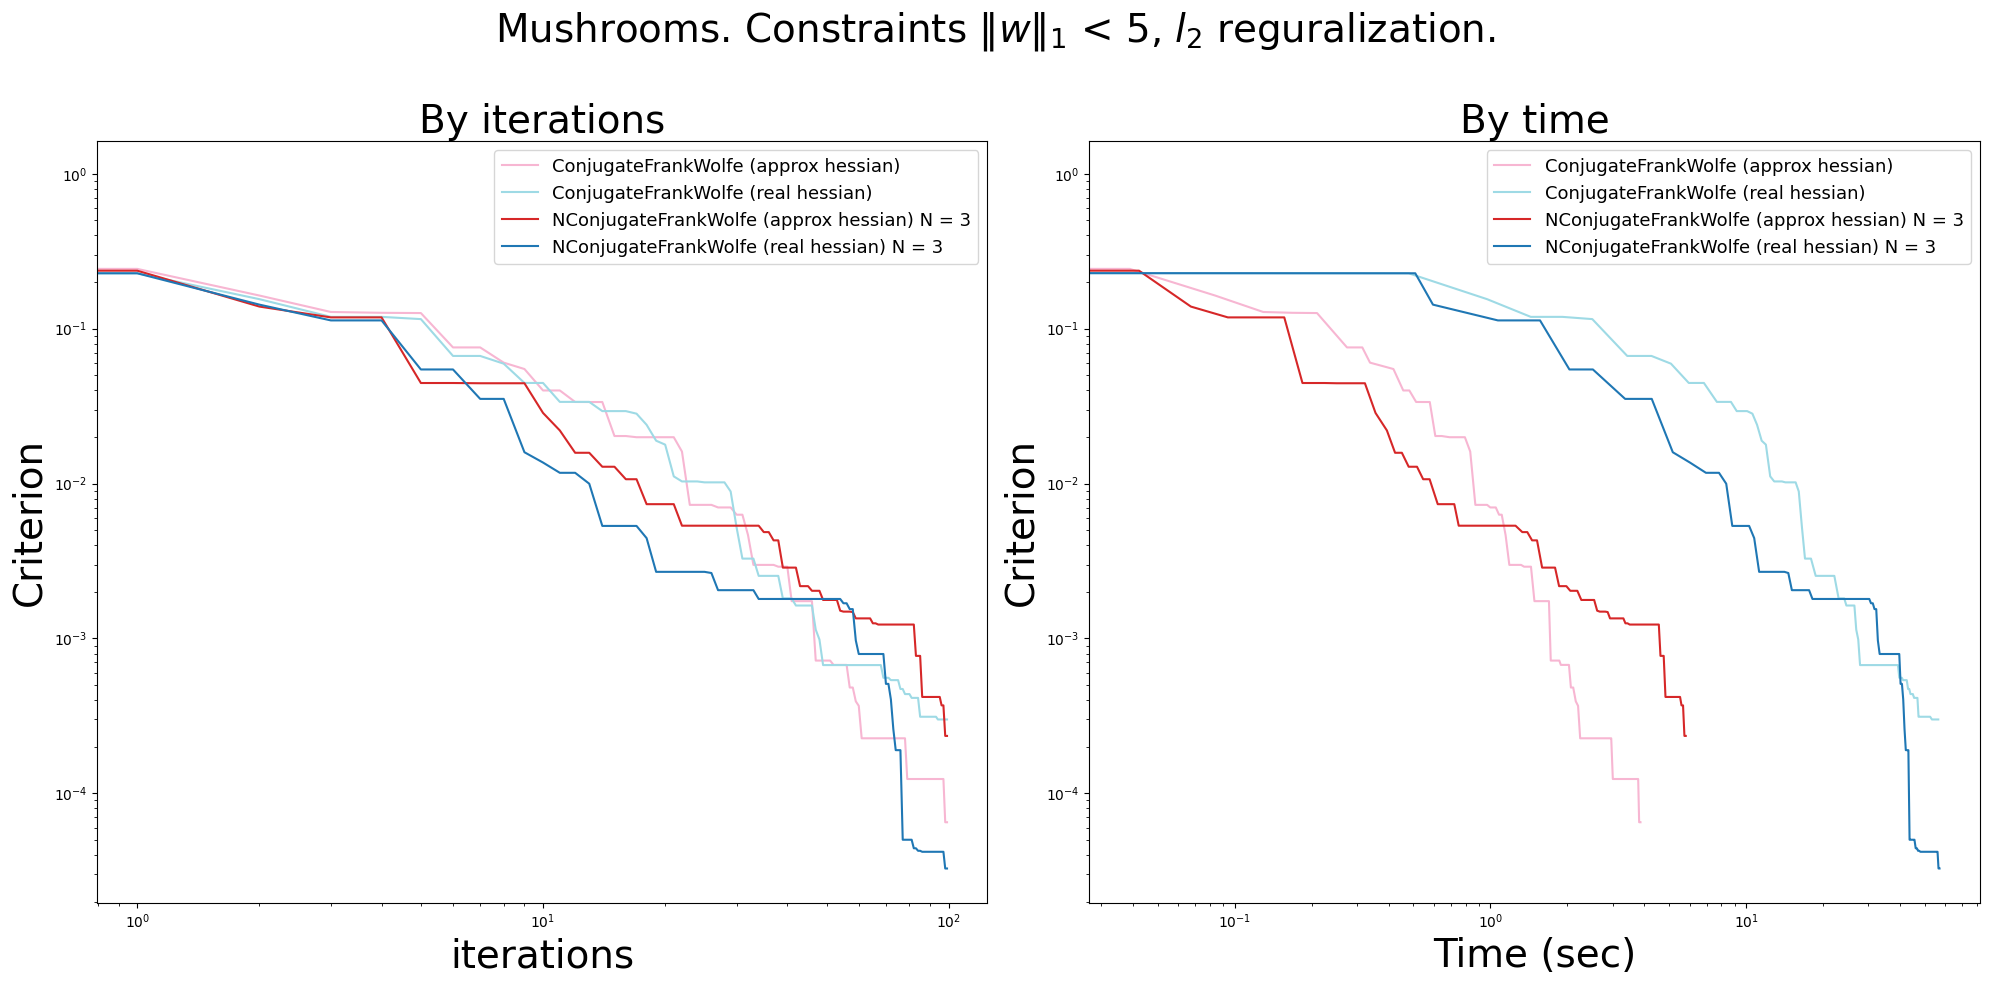

In [ ]:
experiment_name = 'Experiment_1'
with open(experiments_dir+experiment_name+ '.pkl', 'rb') as file:
    loaded_logs = pickle.load(file)
plot_log_K(
    logs = loaded_logs ,
    index_arr = [range(len(loaded_logs)) for _ in range(2)] ,
    times_arr = [None , True ] ,
    accumulated_arr = [True ,True] ,
    main_title = 'Mushrooms. Constraints $\|w\|_1$ < 5, $l_2$ reguralization.' ,
    title_arr = [ 'By iterations' , 'By time'] ,
    save = experiments_dir + experiment_name + '_fig_12.pdf'
)


# Experiment 2
* MNIST: без регуляризации и с регуляризацией : R = 5 [CFW, CFW hess calculate] [NFW, NFW hess calculate] (100 итераций)
* по времени и по итерациям -— показать, что по времени лучше юзать аппроксимцию гессиана.
* в случае без регуляризации -- очень точная аппркосимация гессиана
* в случае с регуляризацией тоже достаточно похожая сходимость

In [ ]:
(X_train ,y_train, X_test ,y_test,L ,lambda_, x_0)  = data_MNIST
methods = [ConjugateFrankWolfe]*2 + [NConjugateFrankWolfe]*2

default_args = {'f': f_reg , 'nabla_f': nabla_f_reg , 'x_0': x_0 ,  'R': 0.2 ,'max_iter': 100 , 'mode': 'gap'}


addition_args = [
                { },
                { 'hess': gessian_f_reg} ,

                { 'n_conjugates': 3 },
                { 'hess': gessian_f_reg , 'n_conjugates': 3} ,
              ]



args = zip_dicts(default_args , addition_args)

logs = experiments( methods , args  , logs = logs )
index = slice(len(logs) - len(methods) ,len(logs))
experiment_indices.append(index)

100%|██████████| 100/100 [00:31<00:00,  3.19it/s]


In [ ]:
logs_idx = experiment_indices[-1]

# SAVE
experiment_name = 'Experiment_2'
data = logs[logs_idx]
with open(experiments_dir+experiment_name+'.pkl', 'wb') as file:
    pickle.dump(data, file)

iter = -1

print('name : ', [log['name'] for log in logs[logs_idx]])
print('l_1 norm : ', [ np.linalg.norm(log['x'][iter] , ord = 1) for log in logs[logs_idx] ])
print('Accuracy : ' , [ acc([log['x'][iter] ]) for log in logs[logs_idx] ])

name :  ['ConjugateFrankWolfe (approx hessian)', 'ConjugateFrankWolfe (real hessian)', 'NConjugateFrankWolfe (approx hessian) N = 3', 'NConjugateFrankWolfe (real hessian) N = 3']
l_1 norm :  [0.07881496353607875, 0.08163297832963692, 0.07658804938977282, 0.08039830152520216]
Accuracy :  [[0.842], [0.852], [0.849], [0.847]]


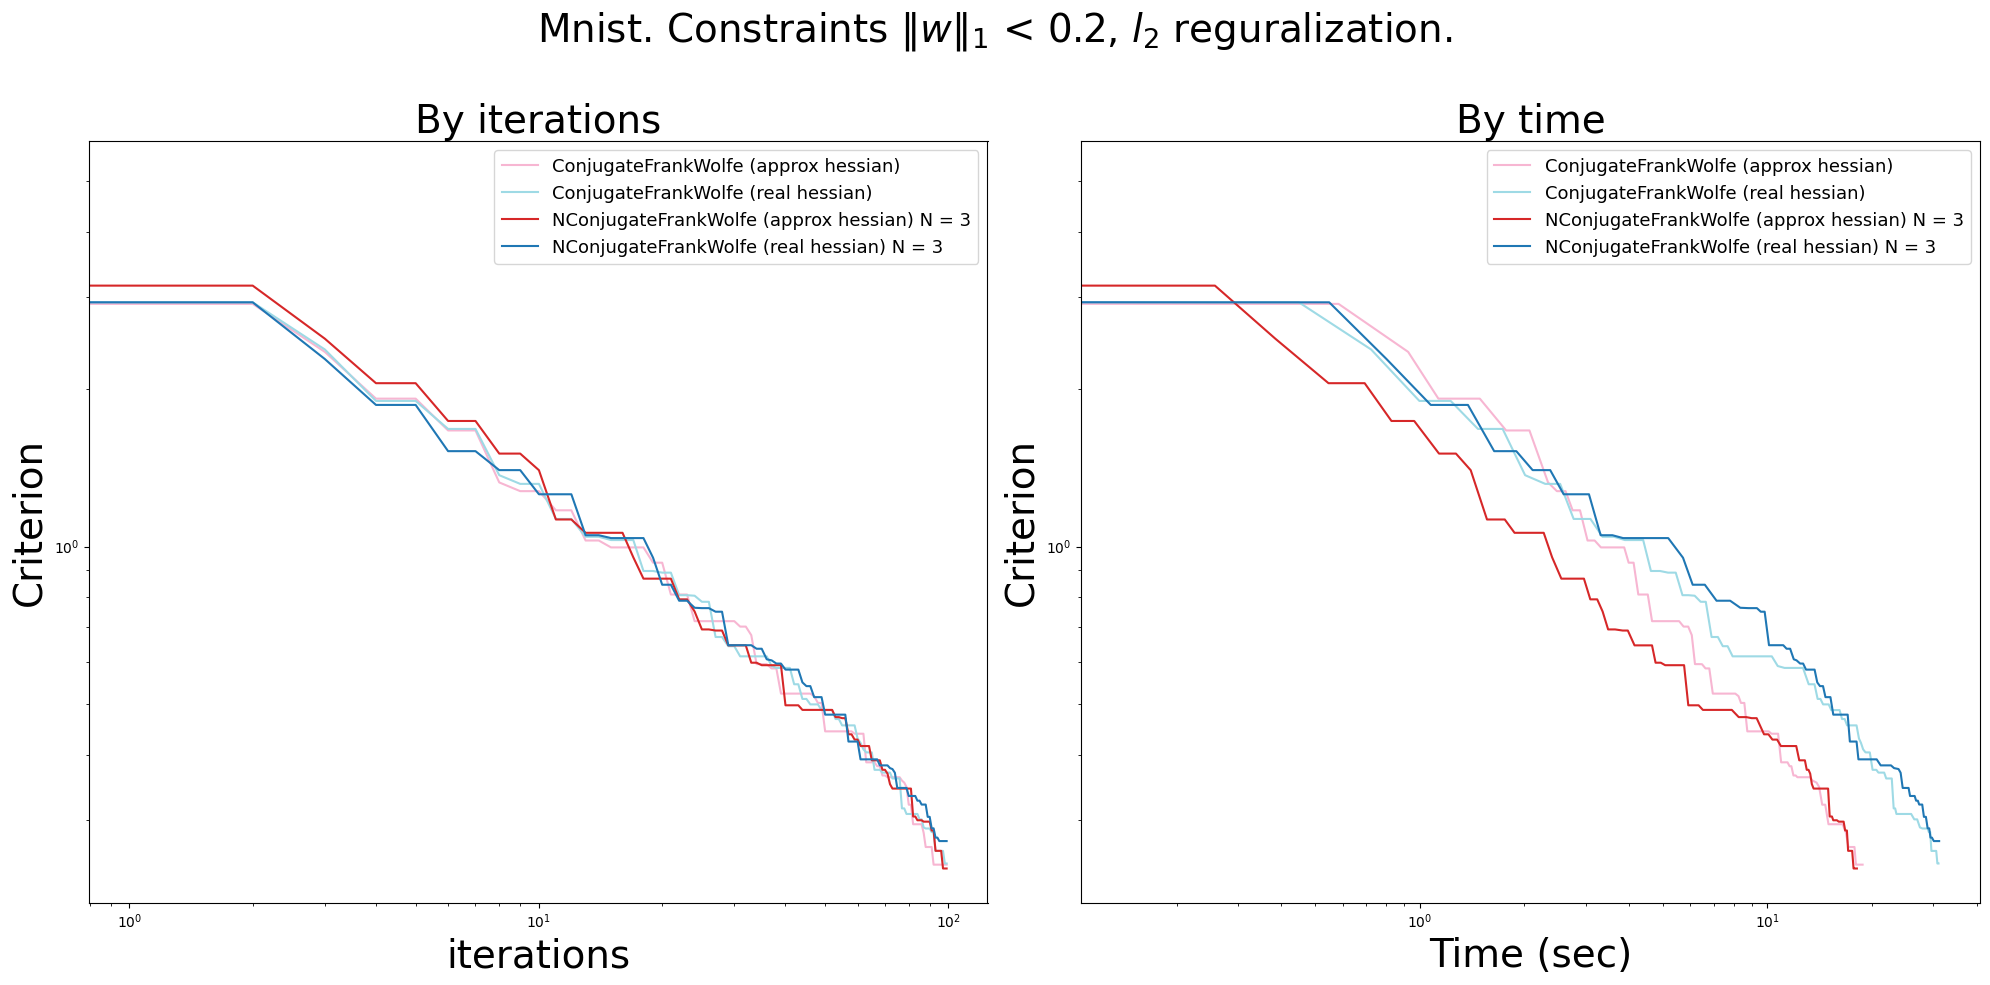

In [ ]:
experiment_name = 'Experiment_2'
with open(experiments_dir+experiment_name+ '.pkl', 'rb') as file:
    loaded_logs = pickle.load(file)



plot_log_K(
    logs = loaded_logs ,
    index_arr = [range(len(loaded_logs)) for _ in range(2)] ,
    times_arr = [None , True ] ,
    accumulated_arr = [True ,True] ,
    main_title = 'Mnist. Constraints $\|w\|_1$ < 0.2, $l_2$ reguralization.' ,
    title_arr = [ 'By iterations' , 'By time'] ,
    save = experiments_dir + experiment_name + '_fig_12.pdf'
)

# Experiment 3
* LIBSVM: без рег: R = 5 [CFW] (200 итераций) — 84 процента — сопряженность к предыдущ направл. Но не особо сопряжено по новому гессиану.


In [ ]:
(X_train ,y_train, X_test ,y_test,L ,lambda_, x_0)  = data_LIBSVM
methods = [ConjugateFrankWolfe]*2

default_args = {'f': f , 'nabla_f': nabla_f , 'x_0': x_0 ,  'R': 5 ,'max_iter': 100 , 'mode': 'gap'}


addition_args = [
                { },
                { 'hess': gessian_f_reg} ,
              ]

args = zip_dicts(default_args , addition_args)

logs = experiments( methods , args  , logs = logs )
index = slice(len(logs) - len(methods) ,len(logs))
experiment_indices.append(index)

100%|██████████| 100/100 [01:03<00:00,  1.57it/s]


In [ ]:
logs_idx = experiment_indices[-1]

# SAVE
experiment_name = 'Experiment_3'
data = logs[logs_idx]
with open(experiments_dir+experiment_name+'.pkl', 'wb') as file:
    pickle.dump(data, file)

iter = -1

print('name : ', [log['name'] for log in logs[logs_idx]])
print('l_1 norm : ', [ np.linalg.norm(log['x'][iter] , ord = 1) for log in logs[logs_idx] ])
print('Accuracy : ' , [ acc([log['x'][iter] ]) for log in logs[logs_idx] ])

name :  ['ConjugateFrankWolfe (approx hessian)', 'ConjugateFrankWolfe (real hessian)']
l_1 norm :  [5.000000000000003, 5.000000000000008]
Accuracy :  [[0.944], [0.944]]


In [ ]:
experiment_name = 'Experiment_3'
with open(experiments_dir+experiment_name+ '.pkl', 'rb') as file:
    loaded_logs = pickle.load(file)

Доля сопряженных пар:  0.826530612244898


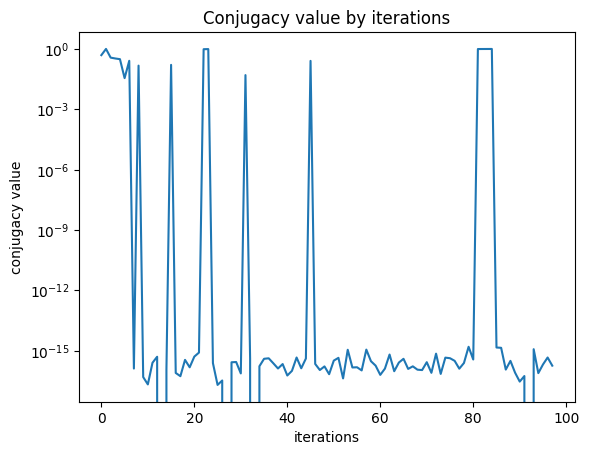

In [ ]:
conjugate = lambda d1 , H , d2 :  np.abs(d1@H@d2)/ np.sqrt( d1@H@d1 * d2@H@d2)

log = loaded_logs[-1]
x = np.array([ i['x'] for i in log['optimizer_log'] ] )
d = np.array([ i['d_k'] for i in log['optimizer_log'] ] )
H = np.array([ i['H_k'] for i in log['optimizer_log'] ] )

d_H_d = np.array([ conjugate(d_1, h , d_2) for d_1 , h , d_2 in list(zip(d[:-1] ,H[1:] ,d[1:] ))])

print('Доля сопряженных пар: ', np.sum(d_H_d < 1e-12) / d_H_d.shape[0] )
plt.plot(d_H_d )
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('conjugacy value')
formula = '$\frac{d_{k-1}^T H^k d_k}{\sqrt{d_{k-1}^T H^k d_{k-1}\cdot d_{k}^T H^k d_k} }$'
plt.title(r'Conjugacy value by iterations')
plt.savefig(experiments_dir + experiment_name + '_fig_1.pdf', format='pdf')
plt.show()

# Experiment 4
* LIBSVM + MNIST: Nesterov на 100 итераций — без регуляризации и с регуляризацией — получить приблиз нормы решений. (  libsvm [1000+ , 30.5 ] , mnist: [2.71 , 0.15 ]  )

In [ ]:
(X_train ,y_train, X_test ,y_test,L ,lambda_, x_0)  = data_LIBSVM
methods = [Nesterov]*2

default_args = {'f': f , 'nabla_f': nabla_f , 'x_0': x_0 ,  'R': 5 ,'max_iter': 1000 , 'mode':  '||nabla_f(x)|| / ||nabla_f(x_0)||' }


addition_args = [
                {'term': 2, 'gamma': 1/L },
                {'term': 2, 'gamma': 1/L , 'f': f_reg , 'nabla_f': nabla_f_reg }
              ]

args = zip_dicts(default_args , addition_args)

logs = experiments( methods , args  , logs = logs )
index = slice(len(logs) - len(methods) ,len(logs))
experiment_indices.append(index)

(X_train ,y_train, X_test ,y_test,L ,lambda_, x_0)  = data_MNIST
methods = [Nesterov]*2

default_args = {'f': f , 'nabla_f': nabla_f , 'x_0': x_0 ,  'R': 5 ,'max_iter': 1000 , 'mode':  '||nabla_f(x)|| / ||nabla_f(x_0)||' }


addition_args = [
                {'term': 2, 'gamma': 1/L },
                {'term': 2, 'gamma': 1/L , 'f': f_reg , 'nabla_f': nabla_f_reg }
              ]

args = zip_dicts(default_args , addition_args)

logs = experiments( methods , args  , logs = logs )
index = slice(len(logs) - len(methods) ,len(logs))
experiment_indices.append(index)

100%|██████████| 1000/1000 [00:32<00:00, 30.54it/s]


In [ ]:
logs_idx1 = experiment_indices[-2]
logs_idx2 = experiment_indices[-1]

# SAVE
experiment_name = 'Experiment_4'
data = logs[logs_idx1] + logs[logs_idx2]
with open(experiments_dir+experiment_name+'.pkl', 'wb') as file:
    pickle.dump(data, file)

iter = -1

print('name : ', [log['name'] for log in data])
print('l_1 norm : ', [ np.linalg.norm(log['x'][iter] , ord = 1) for log in data ])
# print('Accuracy : ' , [ acc([log['x'][iter] ]) for log in logs[logs_idx] ])

name :  ['Nesterov ( term = 2 gamma = 0.19 )', 'Nesterov ( term = 2 gamma = 0.19 )', 'Nesterov ( term = 2 gamma = 0.0 )', 'Nesterov ( term = 2 gamma = 0.0 )']
l_1 norm :  [182.59276757342198, 30.457396891652053, 2.7745926570308193, 0.15114485830831775]


# Experiment 5
* LIBSVM: без рег: R = 5,30,60,150. [NFW N = 2,3,4,5, FW,FW linesearch, CFW]

In [ ]:
(X_train ,y_train, X_test ,y_test,L ,lambda_, x_0)  = data_LIBSVM
R_arr = [5,30,60,150]
methods = []
for R in R_arr :
  methods += [FrankWolfe]*2 +  [ConjugateFrankWolfe] + [NConjugateFrankWolfe]*4

default_args = {'f': f , 'nabla_f': nabla_f , 'x_0': x_0 ,  'R': 5 ,'max_iter': 1000 , 'mode': 'gap'}


addition_args = []
for R in R_arr :
   addition_args+=[
                    {'R':R,'linesearch': True},
                    {'R':R} ,
                    {'R':R} ,
                    {'R':R,'n_conjugates': 2},
                    {'R':R,'n_conjugates': 3},
                    {'R':R,'n_conjugates': 4},
                    {'R':R,'n_conjugates': 5}
                ]

args = zip_dicts(default_args , addition_args)

logs = experiments( methods , args  , logs = logs )
index = slice(len(logs) - len(methods) ,len(logs))
experiment_indices.append(index)

100%|██████████| 1000/1000 [00:59<00:00, 16.83it/s]


In [ ]:
logs_idx = experiment_indices[-1]

# SAVE
experiment_name = 'Experiment_5'
data = logs[logs_idx]
with open(experiments_dir+experiment_name+'.pkl', 'wb') as file:
    pickle.dump(data, file)

iter = -1

print('name : ', [log['name'] for log in logs[logs_idx]])
print('l_1 norm : ', [ np.linalg.norm(log['x'][iter] , ord = 1) for log in logs[logs_idx] ])
print('Accuracy : ' , [ acc([log['x'][iter] ]) for log in logs[logs_idx] ])

name :  ['FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx hessian) N = 3', 'NConjugateFrankWolfe (approx hessian) N = 4', 'NConjugateFrankWolfe (approx hessian) N = 5', 'FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx hessian) N = 3', 'NConjugateFrankWolfe (approx hessian) N = 4', 'NConjugateFrankWolfe (approx hessian) N = 5', 'FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx hessian) N = 3', 'NConjugateFrankWolfe (approx hessian) N = 4', 'NConjugateFrankWolfe (approx hessian) N = 5', 'FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx he

In [ ]:
a = np.arange(4)
a[0:2], a[2:]

(array([0, 1]), array([2, 3]))

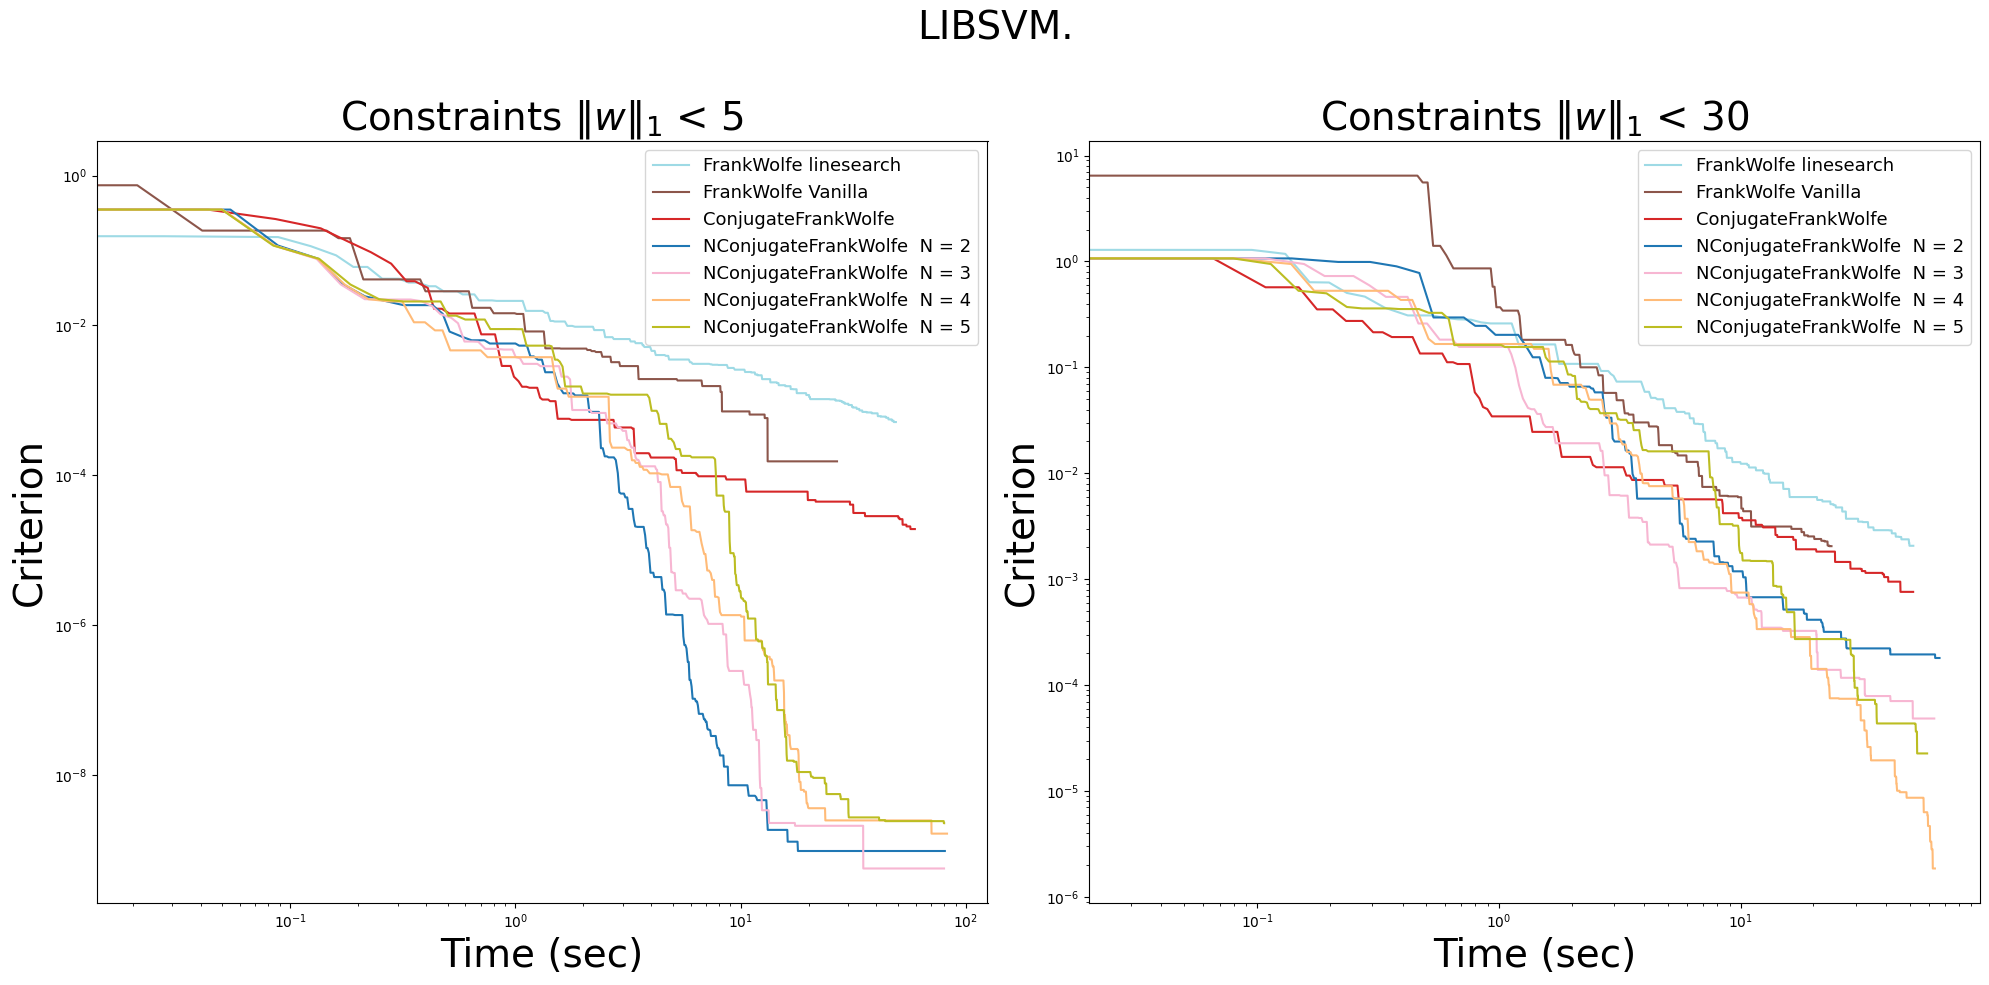

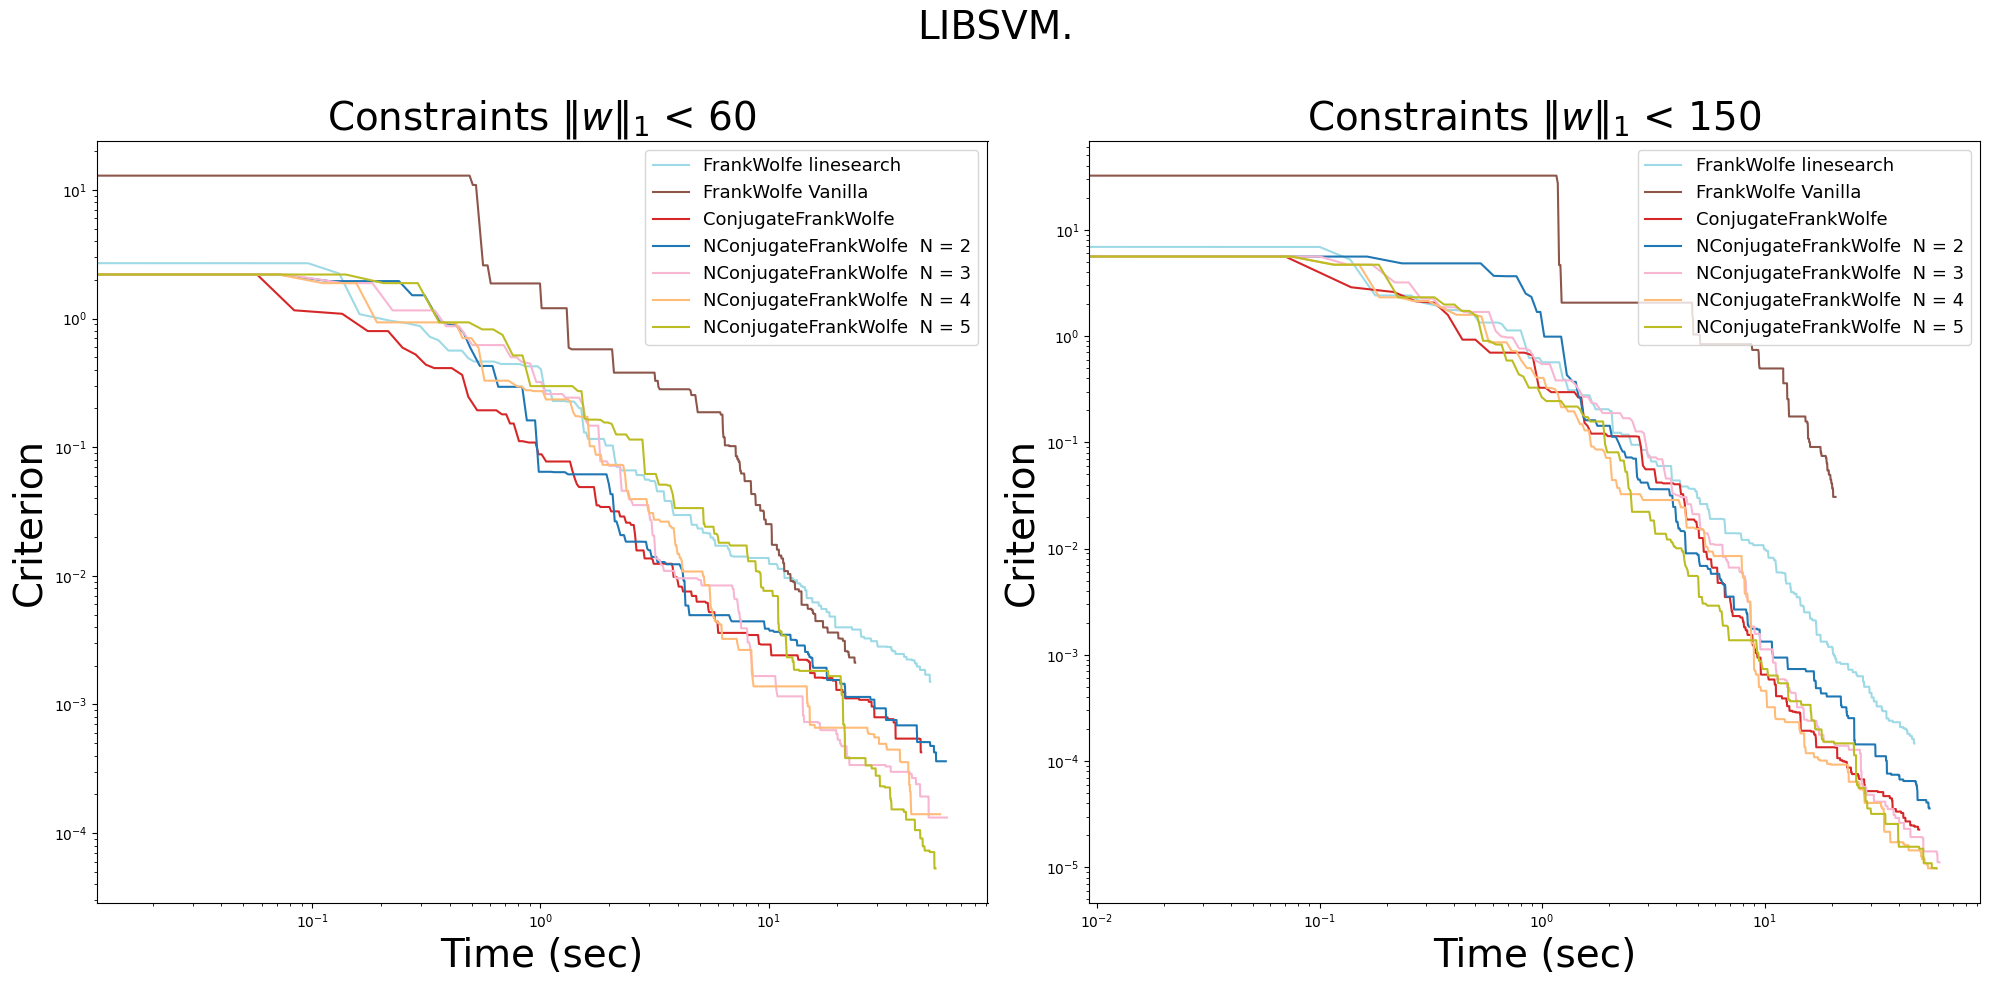

In [ ]:
experiment_name = 'Experiment_5'
with open(experiments_dir+experiment_name+ '.pkl', 'rb') as file:
    loaded_logs = pickle.load(file)

for i in range(len(loaded_logs)):
    string_ = loaded_logs[i]['name']
    substring = '(approx hessian)'
    new_string_ = string_.replace(substring, "", 1)
    loaded_logs[i]['name'] = new_string_

R_arr = [5,30,60,150]

index_arr = []
times_arr = [True]*4
title_arr = []

for i,R in enumerate(R_arr) :
    index = range(100)[i*7:i*7+7]
    index_arr.append(index)
    title_arr.append(f'Constraints $\|w\|_1$ < {R}')
    # plot_log(loaded_logs[i*7:i*7+7] , range(7) , times = True ,title = f'Mushrooms. Constraints $\|w\|_1$ < {R}', save = experiments_dir + experiment_name + '_fig_'+ str(i+1) + '.png' )

plot_log_K(
    logs = loaded_logs ,
    index_arr = index_arr[0:2] ,
    times_arr = times_arr[0:2] ,
    main_title = 'LIBSVM.' ,
    accumulated_arr = [True ,True] ,
    title_arr = title_arr[0:2] ,
    save = experiments_dir + experiment_name + '_fig_12.pdf'
)
plot_log_K(
    logs = loaded_logs ,
    index_arr = index_arr[2:] ,
    times_arr = times_arr[2:] ,
    main_title = 'LIBSVM.' ,
    accumulated_arr = [True ,True] ,
    title_arr = title_arr[2:] ,
    save = experiments_dir + experiment_name + '_fig_34.pdf'
)

## Experiment 6
* LIBSVM: l_2 рег: R  = 5,30,60,150. [NFW N = 2,3,4,5, FW,FW linesearch, CFW]

In [ ]:
(X_train ,y_train, X_test ,y_test,L ,lambda_, x_0)  = data_LIBSVM
R_arr = [5,30,60,150]
methods = []
for R in R_arr :
  methods += [FrankWolfe]*2 +  [ConjugateFrankWolfe] + [NConjugateFrankWolfe]*4

default_args = {'f': f_reg , 'nabla_f': nabla_f_reg , 'x_0': x_0 ,  'R': 5 ,'max_iter': 1000 , 'mode': 'gap'}


addition_args = []
for R in R_arr :
   addition_args+=[
                    {'R':R,'linesearch': True},
                    {'R':R} ,
                    {'R':R} ,
                    {'R':R,'n_conjugates': 2},
                    {'R':R,'n_conjugates': 3},
                    {'R':R,'n_conjugates': 4},
                    {'R':R,'n_conjugates': 5}
                ]

args = zip_dicts(default_args , addition_args)

logs = experiments( methods , args  , logs = logs )
index = slice(len(logs) - len(methods) ,len(logs))
experiment_indices.append(index)

100%|██████████| 1000/1000 [01:10<00:00, 14.14it/s]


In [ ]:
logs_idx = experiment_indices[-1]

# SAVE
experiment_name = 'Experiment_6'
data = logs[logs_idx]
with open(experiments_dir+experiment_name+'.pkl', 'wb') as file:
    pickle.dump(data, file)

iter = -1

print('name : ', [log['name'] for log in logs[logs_idx]])
print('l_1 norm : ', [ np.linalg.norm(log['x'][iter] , ord = 1) for log in logs[logs_idx] ])
print('Accuracy : ' , [ acc([log['x'][iter] ]) for log in logs[logs_idx] ])

name :  ['FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx hessian) N = 3', 'NConjugateFrankWolfe (approx hessian) N = 4', 'NConjugateFrankWolfe (approx hessian) N = 5', 'FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx hessian) N = 3', 'NConjugateFrankWolfe (approx hessian) N = 4', 'NConjugateFrankWolfe (approx hessian) N = 5', 'FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx hessian) N = 3', 'NConjugateFrankWolfe (approx hessian) N = 4', 'NConjugateFrankWolfe (approx hessian) N = 5', 'FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx he

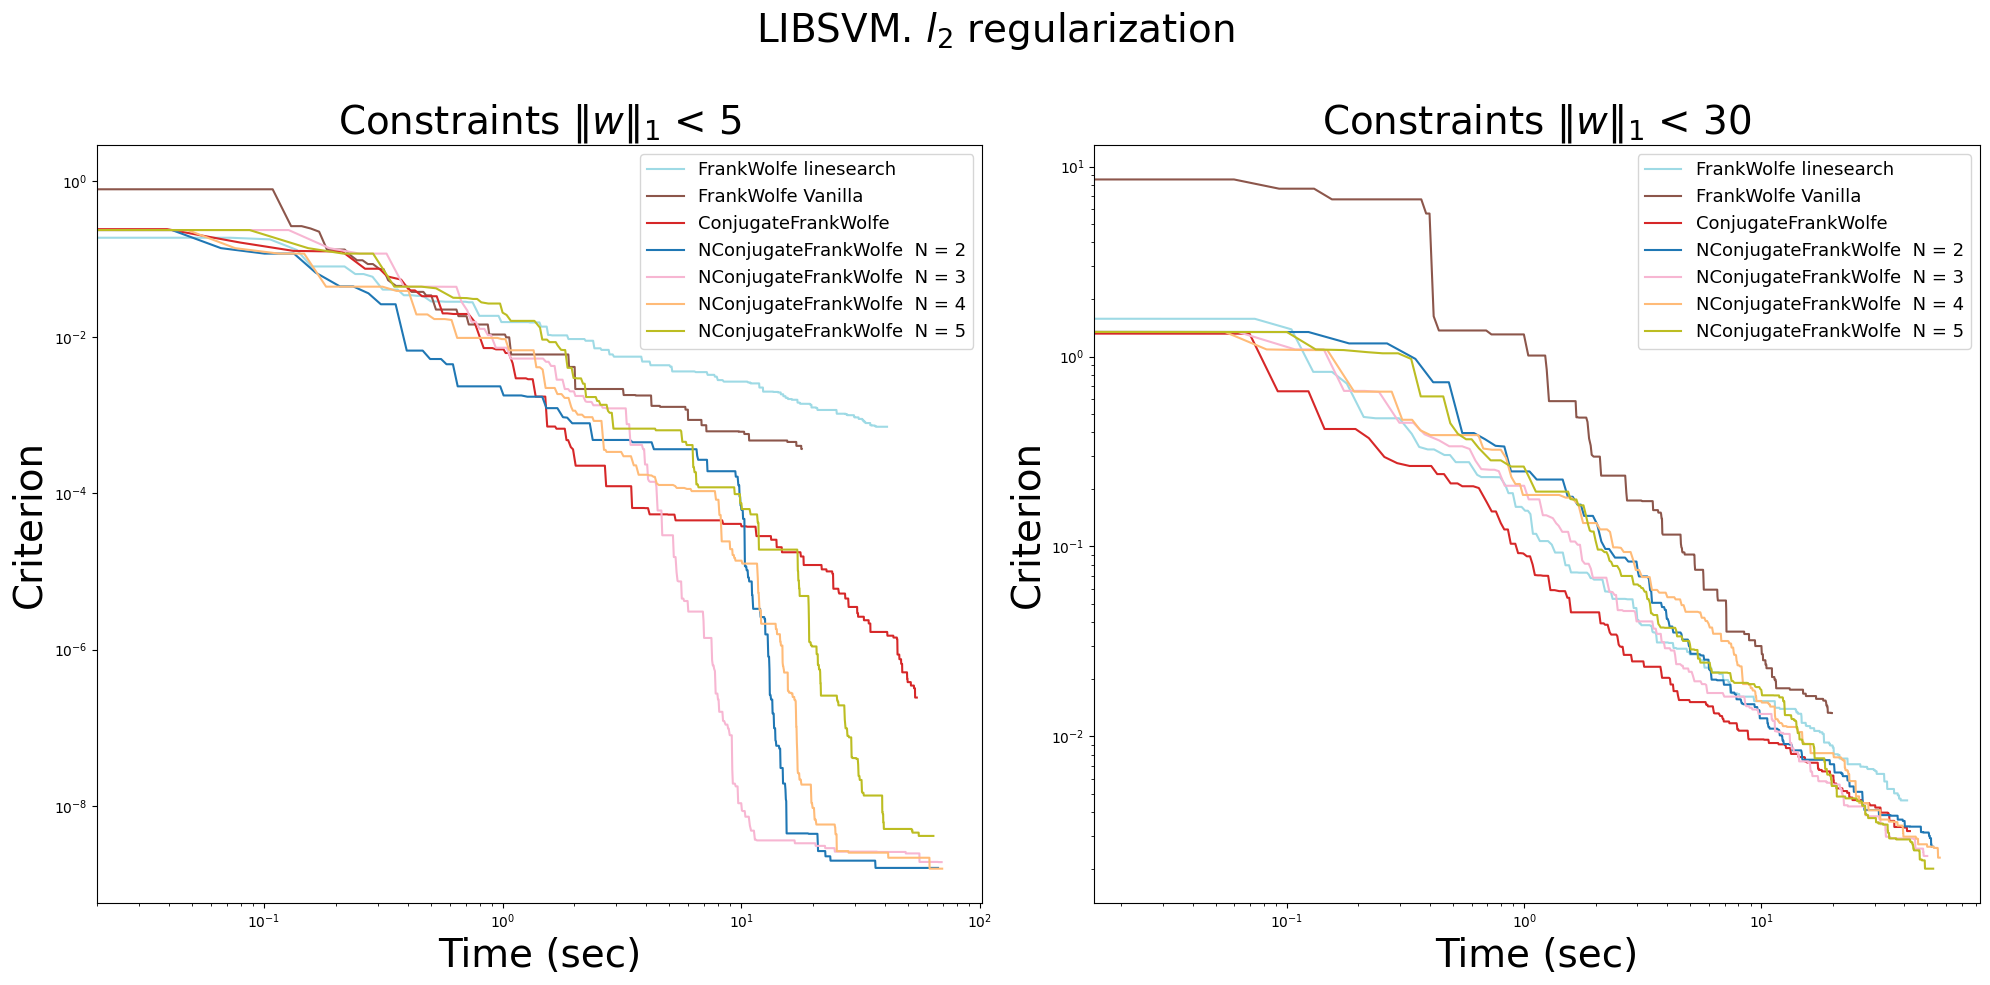

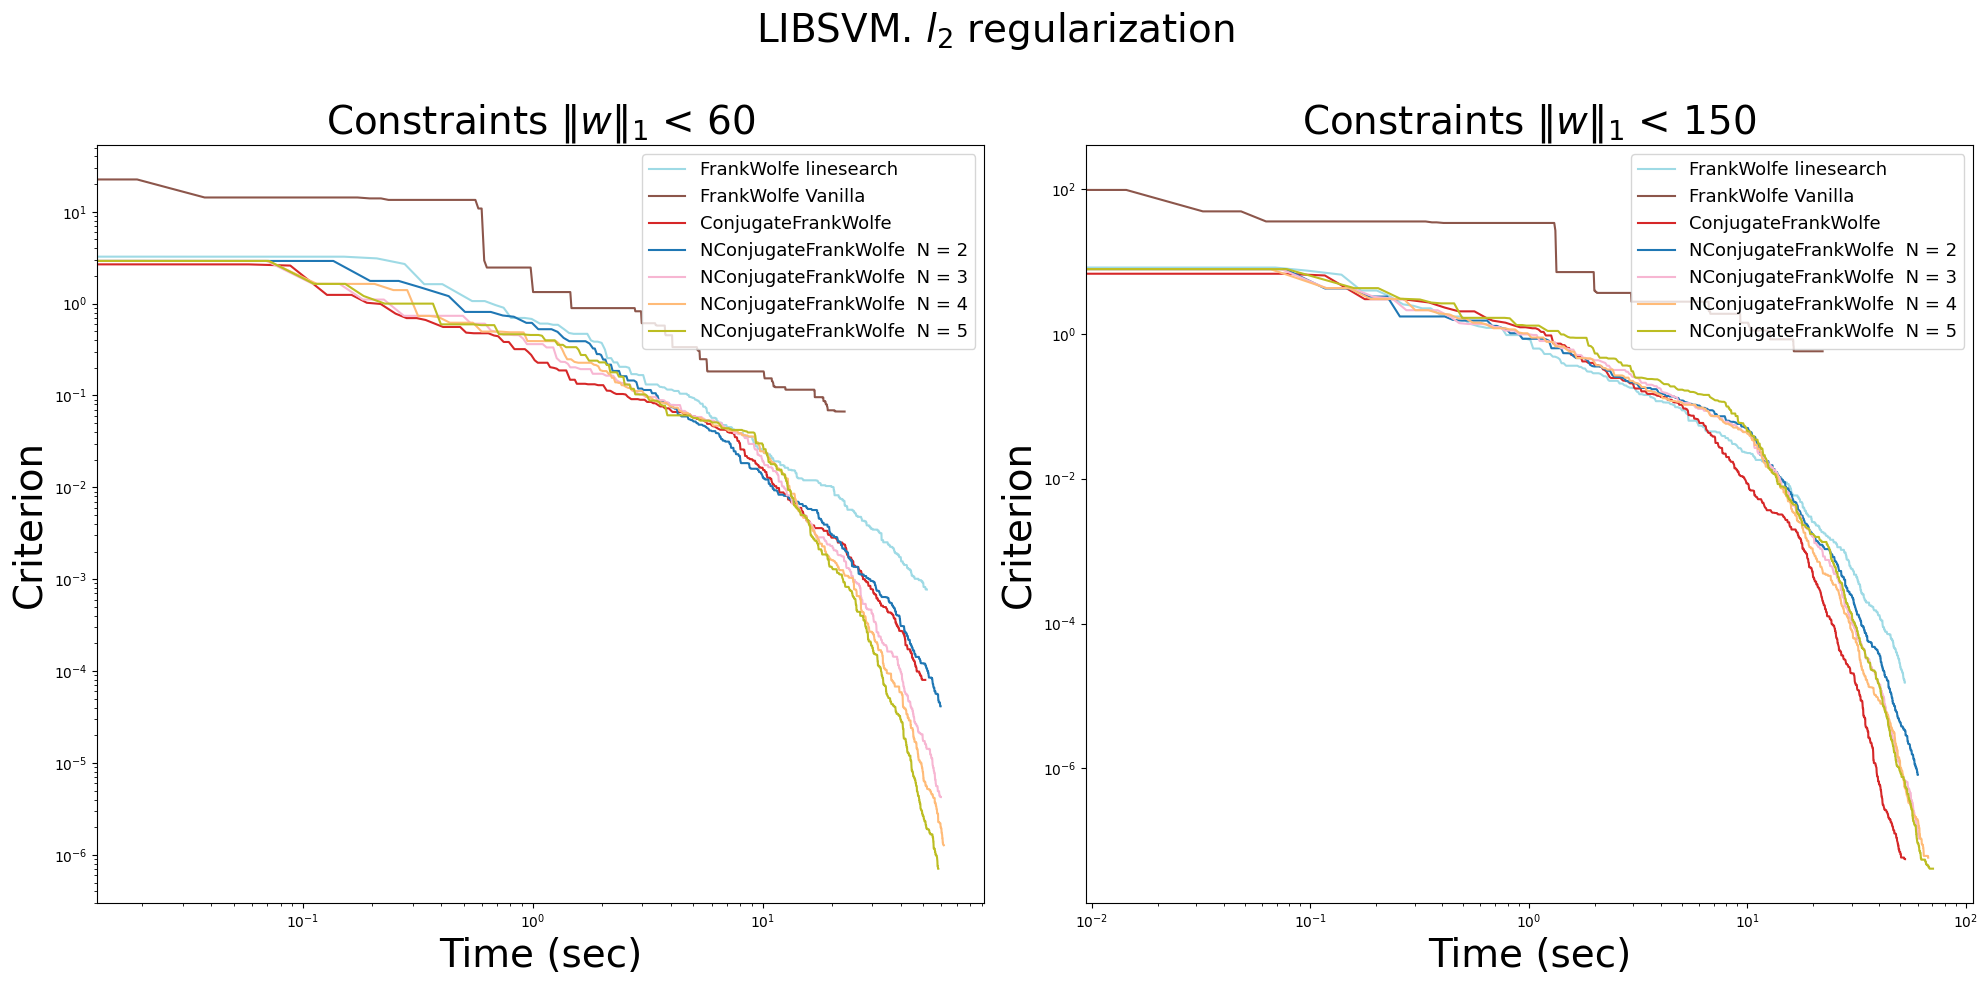

In [ ]:
experiment_name = 'Experiment_6'
with open(experiments_dir+experiment_name+ '.pkl', 'rb') as file:
    loaded_logs = pickle.load(file)

for i in range(len(loaded_logs)):
    string_ = loaded_logs[i]['name']
    substring = '(approx hessian)'
    new_string_ = string_.replace(substring, "", 1)
    loaded_logs[i]['name'] = new_string_

R_arr = [5,30,60,150]
index_arr = []
times_arr = [True]*4
title_arr = []

for i,R in enumerate(R_arr) :
    index = range(100)[i*7:i*7+7]
    index_arr.append(index)
    title_arr.append(f'Constraints $\|w\|_1$ < {R}')

plot_log_K(
    logs = loaded_logs ,
    index_arr = index_arr[0:2] ,
    times_arr = times_arr[0:2] ,
    main_title = 'LIBSVM. $l_2$ regularization' ,
    accumulated_arr = [True ,True] ,
    title_arr = title_arr[0:2] ,
    save = experiments_dir + experiment_name + '_fig_12.pdf'
)
plot_log_K(
    logs = loaded_logs ,
    index_arr = index_arr[2:] ,
    times_arr = times_arr[2:] ,
    main_title = 'LIBSVM. $l_2$ regularization' ,
    accumulated_arr = [True ,True] ,
    title_arr = title_arr[2:] ,
    save = experiments_dir + experiment_name + '_fig_34.pdf'
)

# Experiment 7
* MNIST: без рег: R = 0.1 , 0.8 , 1.5 ,  2.5 ,  [NFW N = 2,3,4,5, FW,FW linesearch, CFW]

In [ ]:
(X_train ,y_train, X_test ,y_test,L ,lambda_, x_0)  = data_MNIST
R_arr = [0.1 , 0.8 , 1.5 ,  2.5]
methods = []
for R in R_arr :
  methods += [FrankWolfe]*2 +  [ConjugateFrankWolfe] + [NConjugateFrankWolfe]*4

default_args = {'f': f , 'nabla_f': nabla_f , 'x_0': x_0 ,  'R': 5 ,'max_iter': 500 , 'mode': 'gap'}


addition_args = []
for R in R_arr :
   addition_args+=[
                    {'R':R,'linesearch': True},
                    {'R':R} ,
                    {'R':R} ,
                    {'R':R,'n_conjugates': 2},
                    {'R':R,'n_conjugates': 3},
                    {'R':R,'n_conjugates': 4},
                    {'R':R,'n_conjugates': 5}
                ]

args = zip_dicts(default_args , addition_args)

logs = experiments( methods , args  , logs = logs )
index = slice(len(logs) - len(methods) ,len(logs))
experiment_indices.append(index)

100%|██████████| 500/500 [01:59<00:00,  4.20it/s]


In [ ]:
logs_idx = experiment_indices[-1]

# SAVE
experiment_name = 'Experiment_7'
data = logs[logs_idx]
with open(experiments_dir+experiment_name+'.pkl', 'wb') as file:
    pickle.dump(data, file)

iter = -1

print('name : ', [log['name'] for log in logs[logs_idx]])
print('l_1 norm : ', [ np.linalg.norm(log['x'][iter] , ord = 1) for log in logs[logs_idx] ])
# print('Accuracy : ' , [ acc([log['x'][iter] ]) for log in logs[logs_idx] ])

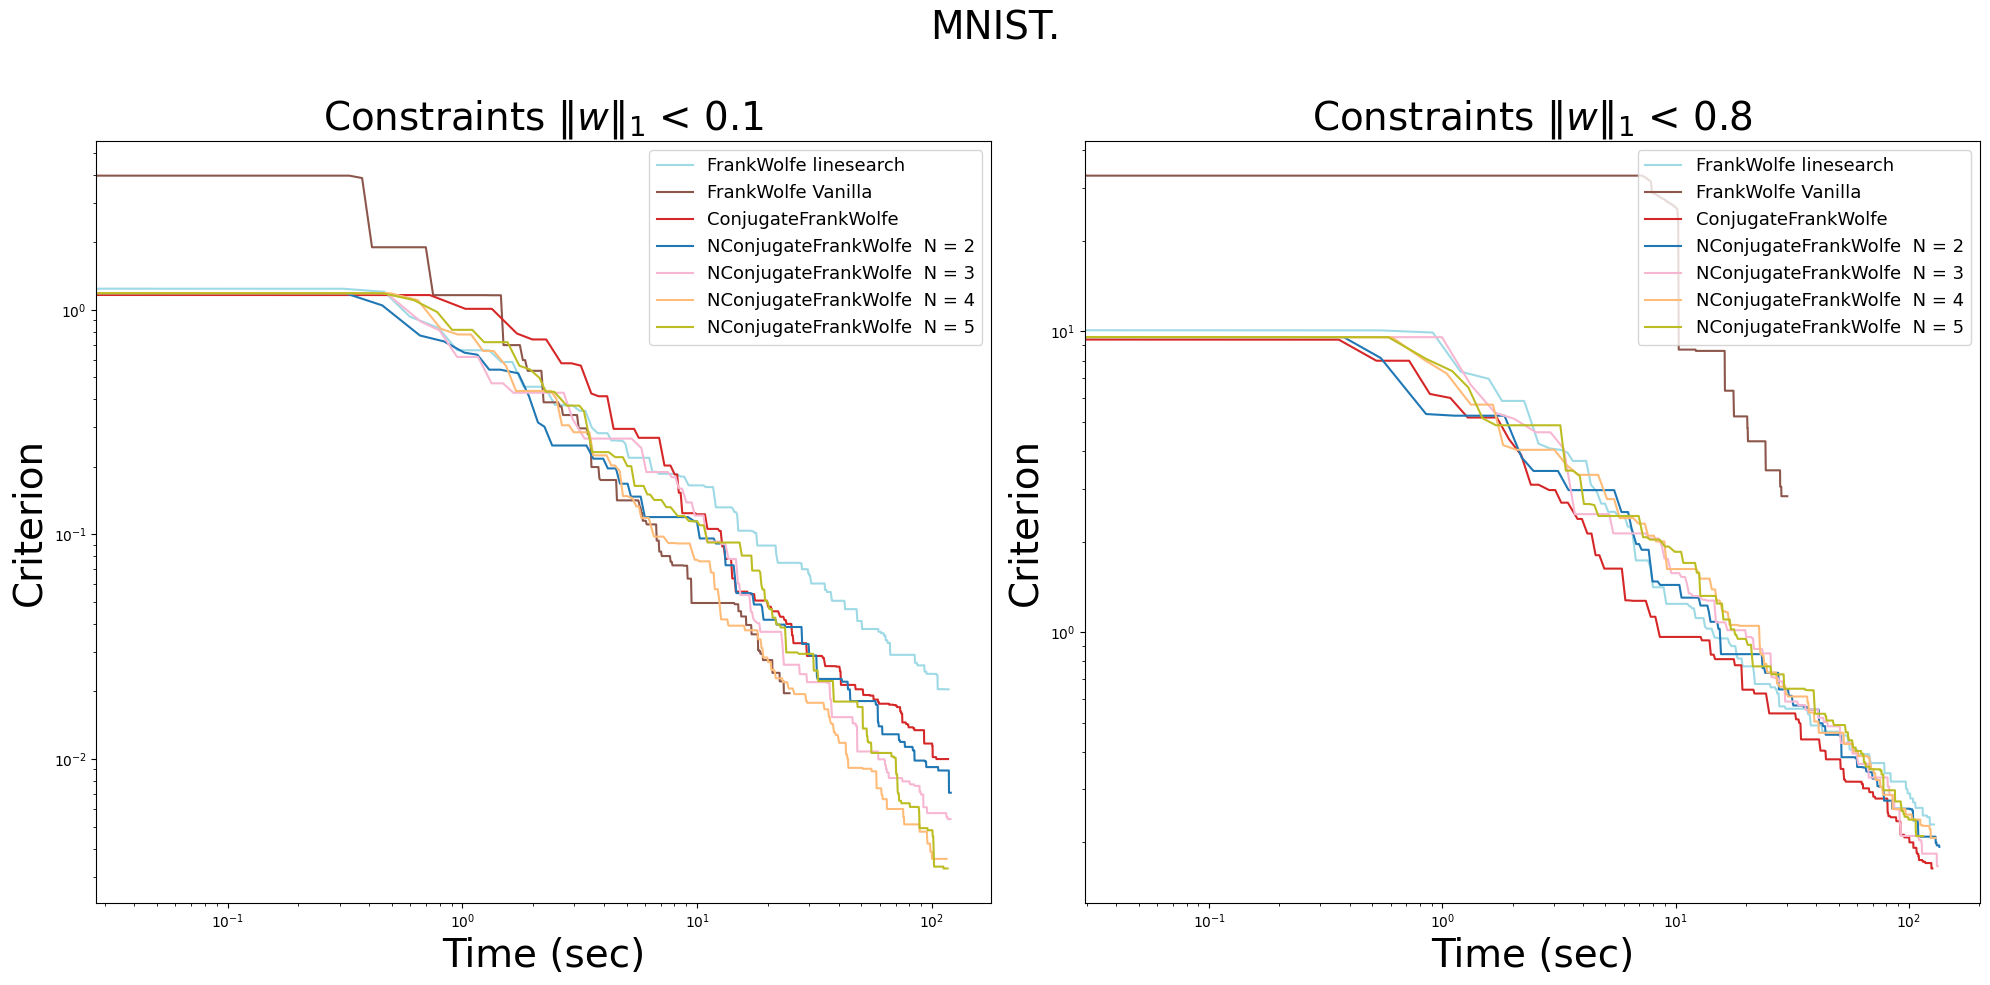

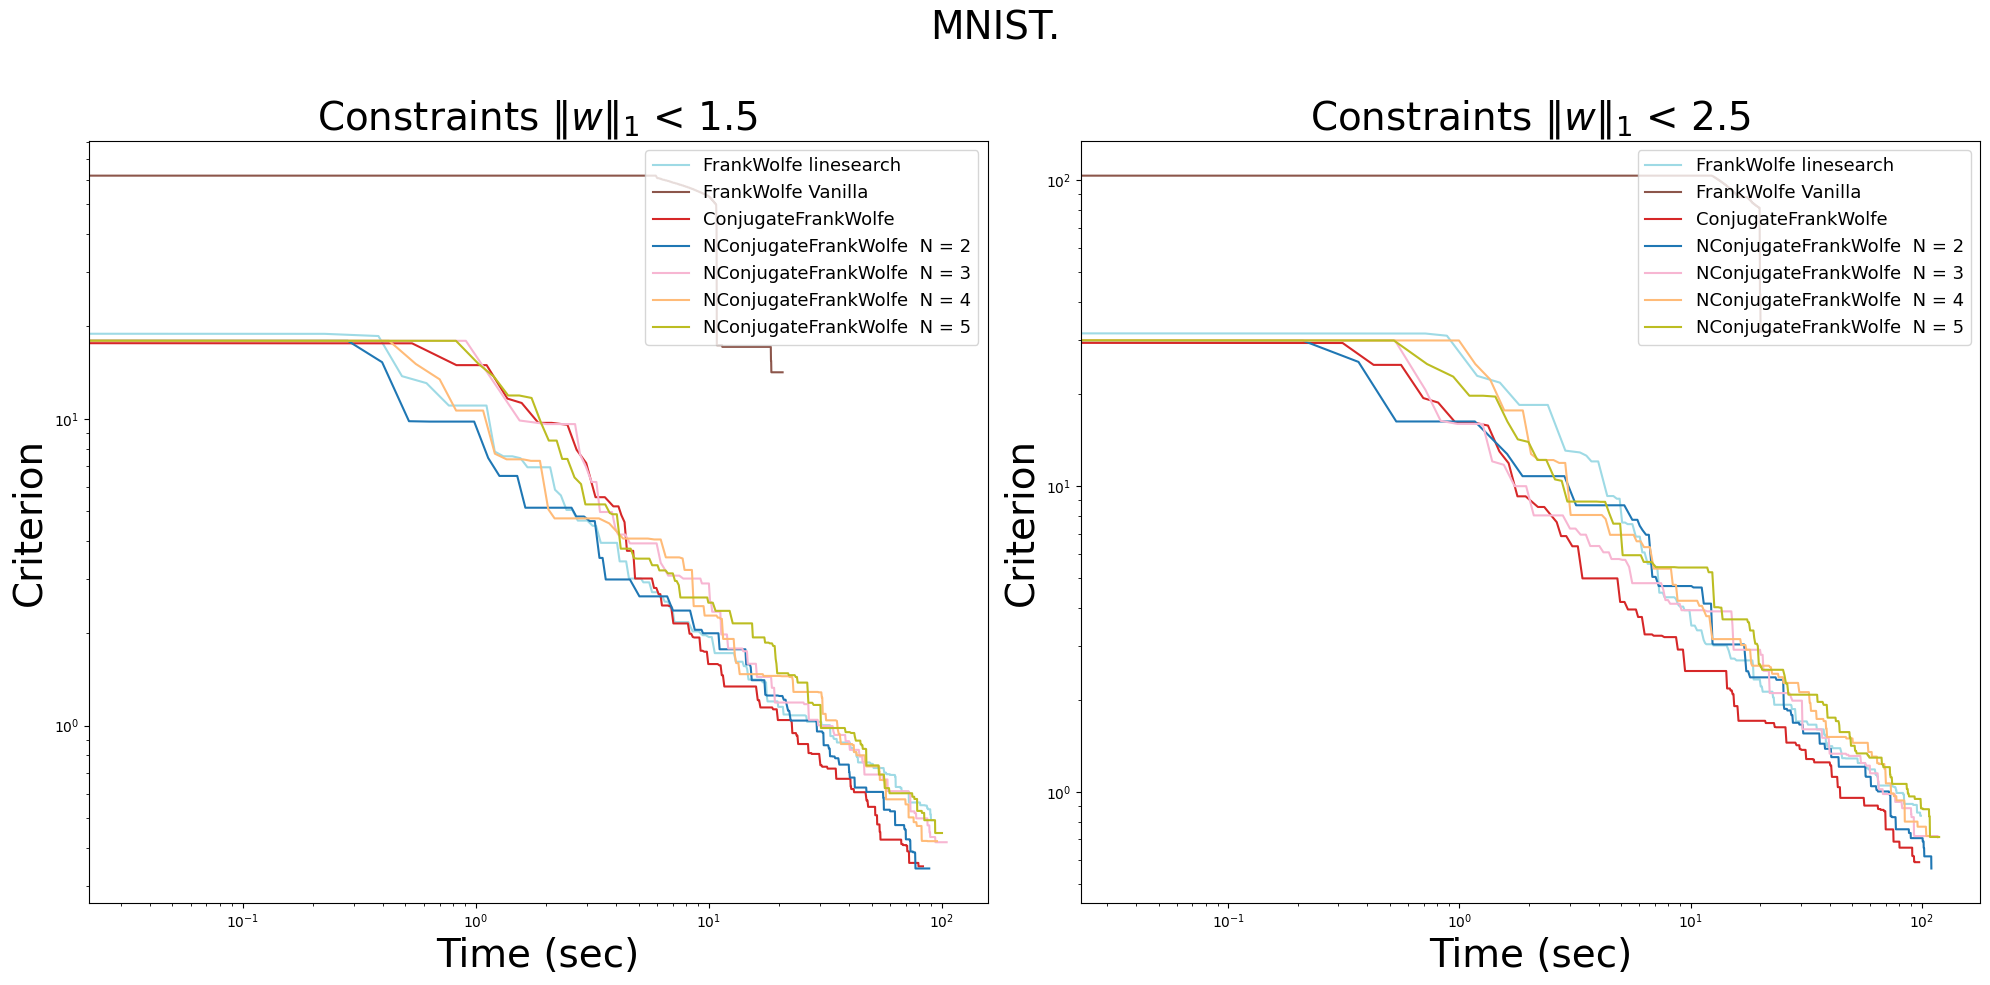

In [ ]:
experiment_name = 'Experiment_7'
with open(experiments_dir+experiment_name+ '.pkl', 'rb') as file:
    loaded_logs = pickle.load(file)

for i in range(len(loaded_logs)):
    string_ = loaded_logs[i]['name']
    substring = '(approx hessian)'
    new_string_ = string_.replace(substring, "", 1)
    loaded_logs[i]['name'] = new_string_

R_arr = [0.1 , 0.8 , 1.5 ,  2.5]

# for i,R in enumerate(R_arr) :
#     plot_log(loaded_logs[i*7:i*7+7] , range(7) , times = True ,title = f'Mnist. Constraints $\|w\|_1$ < {R}', save = experiments_dir + experiment_name + '_fig_' + str(i+1)+ '.png'   )

index_arr = []
times_arr = [True]*4
title_arr = []

for i,R in enumerate(R_arr) :
    index = range(100)[i*7:i*7+7]
    index_arr.append(index)
    title_arr.append(f'Constraints $\|w\|_1$ < {R}')

plot_log_K(
    logs = loaded_logs ,
    index_arr = index_arr[0:2] ,
    times_arr = times_arr[0:2] ,
    main_title = 'MNIST.' ,
    accumulated_arr = [ True , True],
    title_arr = title_arr[0:2] ,
    save = experiments_dir + experiment_name + '_fig_12.pdf'
)
plot_log_K(
    logs = loaded_logs ,
    index_arr = index_arr[2:] ,
    times_arr = times_arr[2:] ,
    main_title = 'MNIST.' ,
    accumulated_arr = [ True , True],
    title_arr = title_arr[2:] ,
    save = experiments_dir + experiment_name + '_fig_34.pdf'
)

# Experiment 8
* MNIST: l_2 рег: R  = 0.01 ,0.1 ,0.2 0.5. [NFW N = 2,3,4,5, FW,FW linesearch, CFW]

In [ ]:
(X_train ,y_train, X_test ,y_test,L ,lambda_, x_0)  = data_MNIST
R_arr = [0.01 ,0.1 ,0.2 ,0.5]
methods = []
for R in R_arr :
  methods += [FrankWolfe]*2 +  [ConjugateFrankWolfe] + [NConjugateFrankWolfe]*4

default_args = {'f': f_reg , 'nabla_f': nabla_f_reg , 'x_0': x_0 ,  'R': 5 ,'max_iter': 500 , 'mode': 'gap'}


addition_args = []
for R in R_arr :
   addition_args+=[
                    {'R':R,'linesearch': True},
                    {'R':R} ,
                    {'R':R} ,
                    {'R':R,'n_conjugates': 2},
                    {'R':R,'n_conjugates': 3},
                    {'R':R,'n_conjugates': 4},
                    {'R':R,'n_conjugates': 5}
                ]

args = zip_dicts(default_args , addition_args)

logs = experiments( methods , args  , logs = logs )
index = slice(len(logs) - len(methods) ,len(logs))
experiment_indices.append(index)

100%|██████████| 500/500 [02:06<00:00,  3.96it/s]


In [ ]:
logs_idx = experiment_indices[-1]

# SAVE
experiment_name = 'Experiment_8'
data = logs[logs_idx]
with open(experiments_dir+experiment_name+'.pkl', 'wb') as file:
    pickle.dump(data, file)

iter = -1

print('name : ', [log['name'] for log in logs[logs_idx]])
print('l_1 norm : ', [ np.linalg.norm(log['x'][iter] , ord = 1) for log in logs[logs_idx] ])
# print('Accuracy : ' , [ acc([log['x'][iter] ]) for log in logs[logs_idx] ])

name :  ['FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx hessian) N = 3', 'NConjugateFrankWolfe (approx hessian) N = 4', 'NConjugateFrankWolfe (approx hessian) N = 5', 'FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx hessian) N = 3', 'NConjugateFrankWolfe (approx hessian) N = 4', 'NConjugateFrankWolfe (approx hessian) N = 5', 'FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx hessian) N = 3', 'NConjugateFrankWolfe (approx hessian) N = 4', 'NConjugateFrankWolfe (approx hessian) N = 5', 'FrankWolfe linesearch', 'FrankWolfe Vanilla', 'ConjugateFrankWolfe (approx hessian)', 'NConjugateFrankWolfe (approx hessian) N = 2', 'NConjugateFrankWolfe (approx he

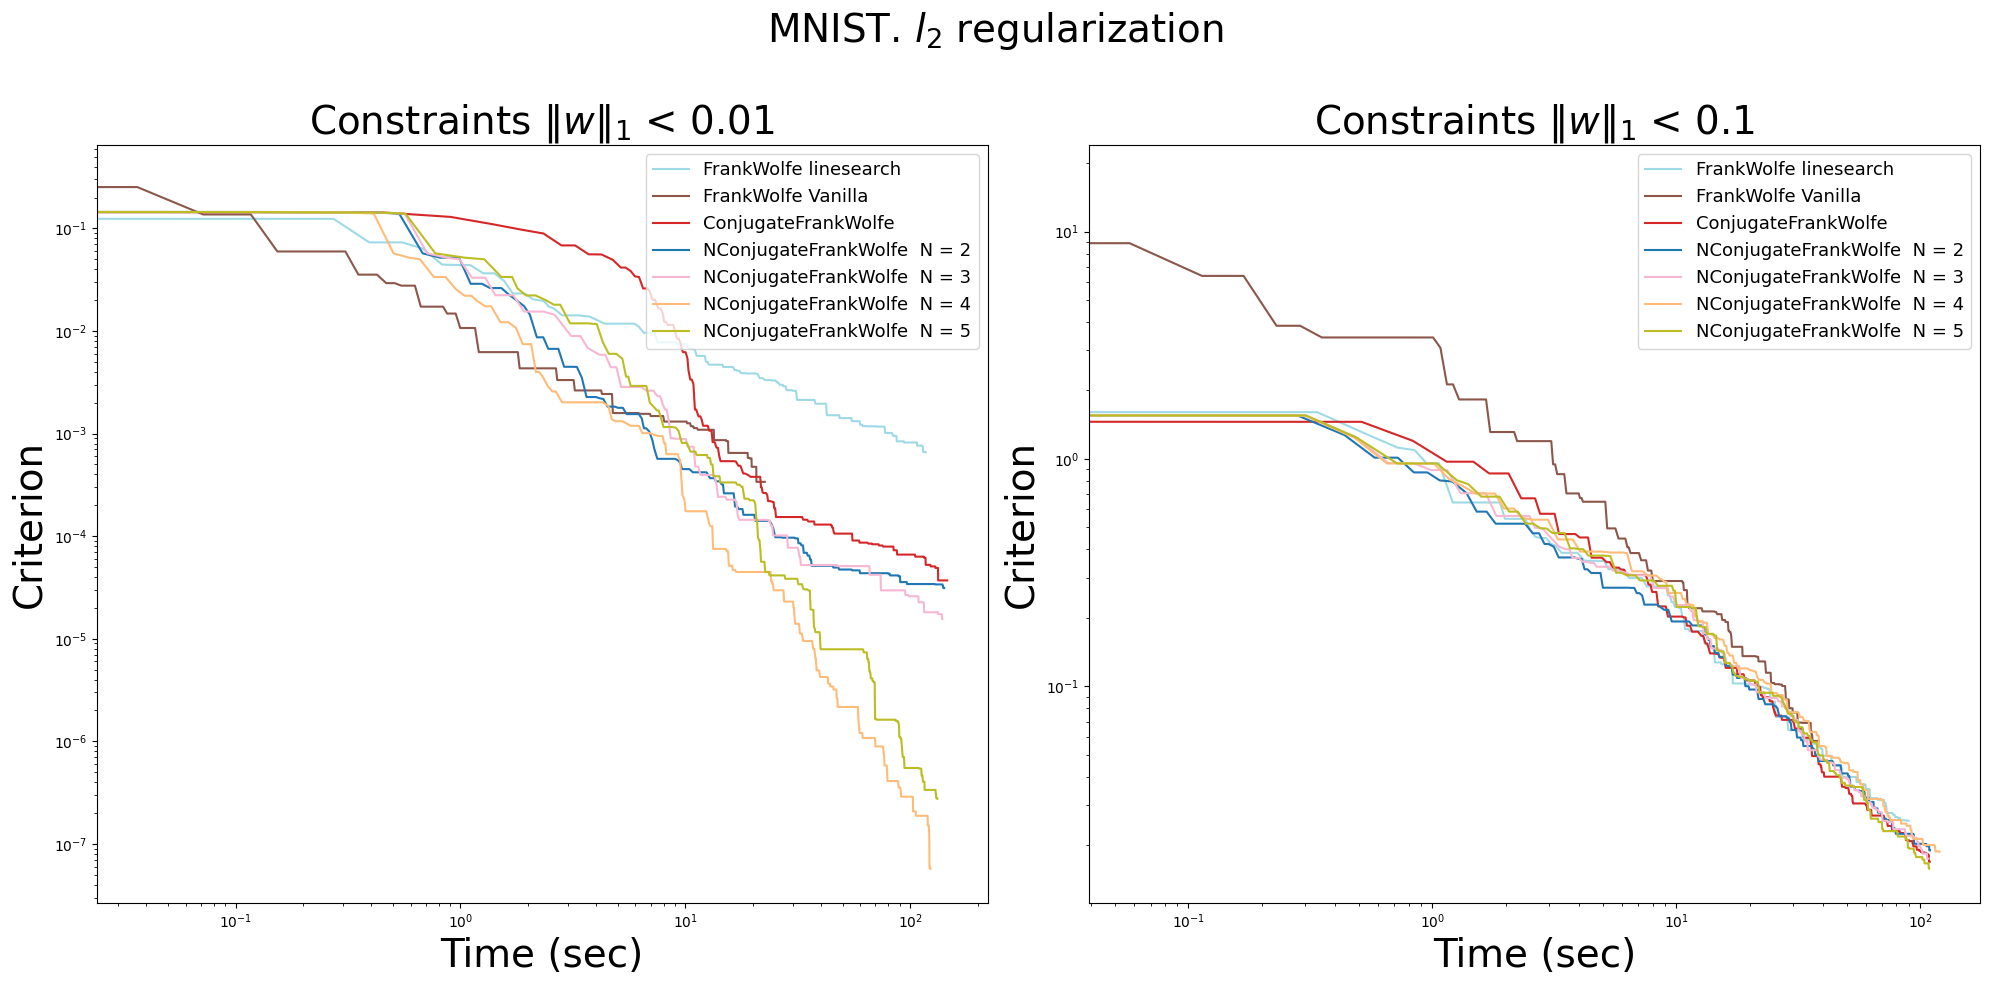

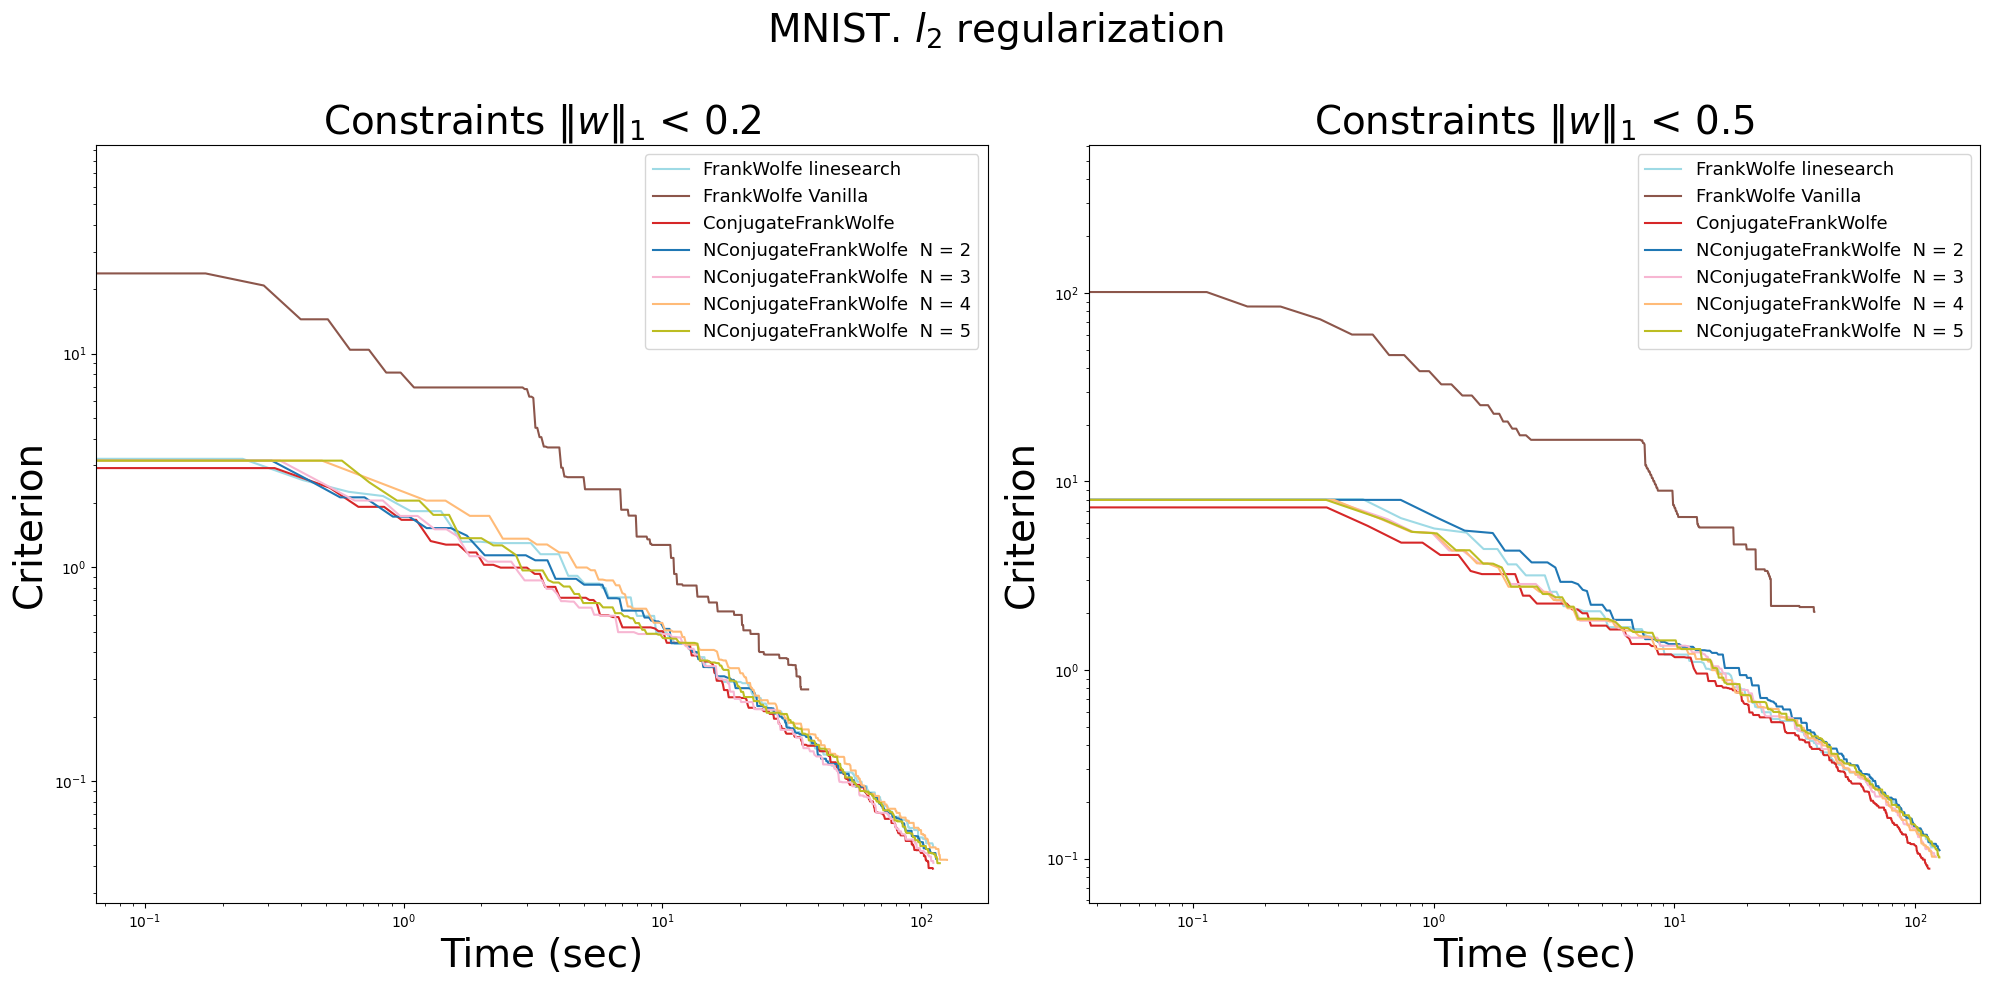

In [ ]:
experiment_name = 'Experiment_8'
with open(experiments_dir+experiment_name+ '.pkl', 'rb') as file:
    loaded_logs = pickle.load(file)

for i in range(len(loaded_logs)):
    string_ = loaded_logs[i]['name']
    substring = '(approx hessian)'
    new_string_ = string_.replace(substring, "", 1)
    loaded_logs[i]['name'] = new_string_


R_arr = [0.01 ,0.1 ,0.2 ,0.5]

# for i,R in enumerate(R_arr) :
#     plot_log(loaded_logs[i*7:i*7+7] , range(7) , times = True ,title = f'Mnist. Constraints $\|w\|_1$ < {R}, $l_2$ regularization' ,  save = experiments_dir + experiment_name + '_fig_' + str(i+1)+ '.png' )

index_arr = []
times_arr = [True]*4
title_arr = []

for i,R in enumerate(R_arr) :
    index = range(100)[i*7:i*7+7]
    index_arr.append(index)
    title_arr.append(f'Constraints $\|w\|_1$ < {R}')

plot_log_K(
    logs = loaded_logs ,
    index_arr = index_arr[0:2] ,
    times_arr = times_arr[0:2] ,
    main_title = 'MNIST. $l_2$ regularization' ,
    accumulated_arr = [ True , True],
    title_arr = title_arr[0:2] ,
    save = experiments_dir + experiment_name + '_fig_12.pdf'
)
plot_log_K(
    logs = loaded_logs ,
    index_arr = index_arr[2:] ,
    times_arr = times_arr[2:] ,
    main_title = 'MNIST. $l_2$ regularization' ,
    accumulated_arr = [ True , True],
    title_arr = title_arr[2:] ,
    save = experiments_dir + experiment_name + '_fig_34.pdf'
)

# Benchmarks


In [ ]:
import pickle
import pandas as pd

In [ ]:
tables = []
for i in range(8):
  experiment_name = 'Experiment_'+ str(i+1)
  with open(experiments_dir+experiment_name+ '.pkl', 'rb') as file:
      loaded_logs = pickle.load(file)
  tables.append(loaded_logs)

In [ ]:
for log in tables:
  print(len(log))

4
4
2
4
28
28
28
28


In [ ]:
table = tables[7]
models = [ log['name'] for log in table[:7] ]

In [ ]:
matrix = np.array([[1,2,3],[4,1,1]])
np.argmax(matrix,axis=-1)

array([2, 0])

In [ ]:
time = table[1]['times'][-1]
# print(table[0]['times'])
np.where(table[0]['times'] < time)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),)

In [ ]:


def get_df(table, R_arr):
  models = [ log['name'] for log in table[:7] ]
  def name_filter(name):
      res = ''
      if 'N =' in name:
          value = name.split('N = ')[-1]
          res+= 'NFW N = '+ value
      elif 'Vanilla' in name:
          res+='FW'
      elif 'lines' in name:
          res+='FW linesearch'
      elif 'Conju' in name:
          res+='CFW'
      return res
  models = [name_filter(name) for name in models]


  table_reshaped = np.array(table).reshape((4,7))

  matrix = np.zeros((4,7))
  for i in range(4):
    min_time = np.inf
    for j in range(7):
      # print(min_time ,table_reshaped[i][j]['times'][-1])
      min_time = min( min_time ,table_reshaped[i][j]['times'][-1] )
    for j in range(7):
      index = np.where(np.array(table_reshaped[i][j]['times']) < min_time )[0][-1]
      matrix[i][j] = table_reshaped[i][j]['accumulated'][index]

  min_index = np.argmin(matrix,axis=-1)
  new_matrix = [['_' for j in range(7)] for i in range(4) ]
  for i in range(4):
    for j in range(7):
      new_matrix[i][j] = str(matrix[i][j])
  for i in range(4):
      new_matrix[i][min_index[i]] = str(matrix[i][min_index[i]]) + '_ISmax'
  matrix = np.array(new_matrix , dtype = str)

  matrix = matrix.T




  d = {'Constrs': R_arr }

  for i in range(7):
      name = models[i]
      value = matrix[i]
      d[name] = value

  df = pd.DataFrame(data =d )
  return df

def format_exponential(y):
    def log_scale(x):
      if x == 0:
          return '$0$'
      elif x < 1:
          k = -int(np.floor(np.log10(x)))
          n = x * 10**k
          return f'${n:.2f}e' +'^{' +f'{-k}' + '}$'
      else:
          return f'${x:.2f}$'
    if type(y) == type('_') :
      if 'ISmax' in y:
        x = float(y.split('_')[0])
        return '{\color{green}' +  log_scale(x) + '}'
      else:
        x = float(y)
        return log_scale(x)
    else:
      return f'${y:.2f}$'




In [ ]:

R_arr = [5,30,60,150]
df = get_df(tables[4], R_arr)
print(f'Mushrooms.')
for key in df.keys():
  df[key] = df[key].apply(format_exponential)

print(df.to_latex(index=False))

Mushrooms.
\begin{tabular}{llllllll}
\toprule
Constrs & FW linesearch & FW & CFW & NFW N = 2 & NFW N = 3 & NFW N = 4 & NFW N = 5 \\
\midrule
$5.00$ & $9.93e^{-4}$ & $1.54e^{-4}$ & $4.46e^{-5}$ & {\color{green}$9.72e^{-10}$} & $2.11e^{-9}$ & $2.49e^{-9}$ & $5.59e^{-9}$ \\
$30.00$ & $5.11e^{-3}$ & $2.05e^{-3}$ & $1.82e^{-3}$ & $3.19e^{-4}$ & $1.40e^{-4}$ & {\color{green}$7.52e^{-5}$} & $2.72e^{-4}$ \\
$60.00$ & $3.82e^{-3}$ & $2.11e^{-3}$ & $1.12e^{-3}$ & $1.14e^{-3}$ & {\color{green}$3.38e^{-4}$} & $6.59e^{-4}$ & $3.83e^{-4}$ \\
$150.00$ & $9.20e^{-4}$ & $3.06e^{-2}$ & $1.34e^{-4}$ & $4.06e^{-4}$ & $1.40e^{-4}$ & {\color{green}$9.27e^{-5}$} & $1.47e^{-4}$ \\
\bottomrule
\end{tabular}



In [ ]:

R_arr = [5,30,60,150]
df = get_df(tables[5], R_arr)
print(f'Mushrooms. $l_2$ regularization ')
for key in df.keys():
  df[key] = df[key].apply(format_exponential)
print(df.to_latex(index=False))

Mushrooms. $l_2$ regularization 
\begin{tabular}{llllllll}
\toprule
Constrs & FW linesearch & FW & CFW & NFW N = 2 & NFW N = 3 & NFW N = 4 & NFW N = 5 \\
\midrule
$5.00$ & $1.41e^{-3}$ & $3.71e^{-4}$ & $1.56e^{-5}$ & $4.42e^{-9}$ & {\color{green}$3.30e^{-9}$} & $1.86e^{-8}$ & $4.86e^{-6}$ \\
$30.00$ & $8.96e^{-3}$ & $1.33e^{-2}$ & $6.21e^{-3}$ & $7.13e^{-3}$ & $5.61e^{-3}$ & $8.16e^{-3}$ & {\color{green}$5.48e^{-3}$} \\
$60.00$ & $7.11e^{-3}$ & $6.69e^{-2}$ & $2.40e^{-3}$ & $2.12e^{-3}$ & $1.57e^{-3}$ & $1.13e^{-3}$ & {\color{green}$9.26e^{-4}$} \\
$150.00$ & $1.82e^{-3}$ & $5.73e^{-1}$ & {\color{green}$2.06e^{-4}$} & $1.22e^{-3}$ & $1.00e^{-3}$ & $5.40e^{-4}$ & $1.34e^{-3}$ \\
\bottomrule
\end{tabular}



In [ ]:
R_arr = [0.1 , 0.8 , 1.5 ,  2.5]
df = get_df(tables[6], R_arr)
print(f'MNIST. ')
for key in df.keys():
  df[key] = df[key].apply(format_exponential)

print(df.to_latex(index=False))

MNIST. 
\begin{tabular}{llllllll}
\toprule
Constrs & FW linesearch & FW & CFW & NFW N = 2 & NFW N = 3 & NFW N = 4 & NFW N = 5 \\
\midrule
$0.10$ & $7.48e^{-2}$ & {\color{green}$1.97e^{-2}$} & $4.00e^{-2}$ & $3.87e^{-2}$ & $2.63e^{-2}$ & $2.06e^{-2}$ & $2.98e^{-2}$ \\
$0.80$ & $5.56e^{-1}$ & $2.83$ & {\color{green}$5.37e^{-1}$} & $6.45e^{-1}$ & $5.88e^{-1}$ & $6.22e^{-1}$ & $6.48e^{-1}$ \\
$1.50$ & $1.15$ & $14.17$ & {\color{green}$1.04$} & $1.25$ & $1.19$ & $1.45$ & $1.48$ \\
$2.50$ & $1.93$ & $32.05$ & {\color{green}$1.63$} & $2.33$ & $2.11$ & $2.44$ & $2.51$ \\
\bottomrule
\end{tabular}



In [ ]:
R_arr = [0.01 ,0.1 ,0.2 ,0.5]
df = get_df(tables[7], R_arr)
for key in df.keys():
  df[key] = df[key].apply(format_exponential)

print(f'MNIST. $l_2$ regularization ')
print(df.to_latex(index=False))

MNIST. $l_2$ regularization 
\begin{tabular}{llllllll}
\toprule
Constrs & FW linesearch & FW & CFW & NFW N = 2 & NFW N = 3 & NFW N = 4 & NFW N = 5 \\
\midrule
$0.01$ & $3.47e^{-3}$ & $3.38e^{-4}$ & $2.63e^{-4}$ & $1.41e^{-4}$ & $1.44e^{-4}$ & {\color{green}$4.47e^{-5}$} & $5.62e^{-5}$ \\
$0.10$ & $5.39e^{-2}$ & $5.75e^{-2}$ & $4.93e^{-2}$ & {\color{green}$4.69e^{-2}$} & $4.92e^{-2}$ & $6.02e^{-2}$ & $5.01e^{-2}$ \\
$0.20$ & $1.63e^{-1}$ & $2.68e^{-1}$ & $1.46e^{-1}$ & $1.60e^{-1}$ & {\color{green}$1.42e^{-1}$} & $1.74e^{-1}$ & $1.65e^{-1}$ \\
$0.50$ & $4.10e^{-1}$ & $2.03$ & {\color{green}$3.82e^{-1}$} & $4.65e^{-1}$ & $4.28e^{-1}$ & $4.35e^{-1}$ & $4.45e^{-1}$ \\
\bottomrule
\end{tabular}

